<h1 style='color:red'> Data Science Capstone - Project 2 : Healthcare</h1>

<h2 style='color:blue'> Ms. Shamali V. Sawant</h2>

<img src ='healthcare.jfif'>

**Context:**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Problem Statement:**

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

**Dataset Description:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


   * Pregnancies: Number of times pregnant
   * Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   * BloodPressure: Diastolic blood pressure (mm Hg)
   * SkinThickness: Triceps skin fold thickness (mm)
   * Insulin: 2-Hour serum insulin (mu U/ml)
   * BMI: Body mass index (weight in kg/(height in m)^2)
   * DiabetesPedigreeFunction: Diabetes pedigree function
   * Age: Age (years)
   * Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

**Approach:**

Following pointers will be helpful to structure your findings.   

1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
        •	Glucose
        •	BloodPressure
        •	SkinThickness
        •	Insulin
        •	BMI

      How will you treat these values?

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 


4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 
        * Pie chart to describe the diabetic/non-diabetic population
        * Scatter charts between relevant variables to analyse the relationships
        * Histogram/frequency charts to analyse the distribution of the data
        * Heatmap of correlation analysis among the relevant variables
        * Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart. 


# 1. Import necessary libraries for EDA 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display_html,Markdown,display,HTML
from termcolor import colored
from colored import stylize

from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#define necessary functions
#1. for customized printing
def printmd(string, color = None):
    colorstr = "<span style='color:{}'>{}</span>".format(color,string)
    display(Markdown(colorstr))
    
#2. To plot distribution
def distplot (figRows, figCols, xSize, ySize, data, features, colors, kde=True, bins = None):
    f, axes = plt.subplots(figRows, figCols, figsize = (xSize, ySize))
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1):
                axesplt = axes
            elif (figRows == 1 and figCols > 1):
                axesplt = axes[col]
            elif (figRows > 1 and figCols ==1):
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.distplot(data[features[row][col]],
                               color = colors[row][col],
                               bins = bins, ax = axesplt,kde = kde,
                                hist_kws = {'edgecolor':'k'})
            plot.set_xlabel(features[row][col],fontsize = 20)


#3. display dataframe side by side
def display_side_by_side(args):
    html_str =''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style = "display:inline;margin-left:50px !important;margin-right: 40px !important"'),raw = True)
#display: inline - no line break before or after the element

In [3]:
df = pd.read_csv("health care diabetes.csv")

In [4]:
df_copy = df.copy()

In [5]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. EDA 

In [6]:
features = df_copy.columns.drop(['Outcome'])
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# 2.a] Shape of Data 

In [7]:
printmd("**Number of rows in the dataset are: "+str(df_copy.shape[0])+"**",color = 'brown')
printmd("**Number of features in the dataset are: "+str(df_copy.shape[1])+"**",color = 'brown')

<span style='color:brown'>**Number of rows in the dataset are: 768**</span>

<span style='color:brown'>**Number of features in the dataset are: 9**</span>

# 2.b] Data type of each attribute 

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 2.c] Five point summary of the data 

In [9]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h3 style='color:red'> Observations: </h3>
    
* There is a significant difference between mean and standard deviaition in case of features - 'Glucose','Insulin'
* So, there is a possibility of skewness in the data. We will check it in later point of time.

# 2.d] Check for missing values

In [10]:
#missing values
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 2.e] Unique values for each feature 

In [11]:
#unique values in new dataset
df_copy.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
for col in df_copy.columns:
    print("\nUnique value in ",col,"feature are:\n",
          pd.DataFrame(df_copy[col].value_counts()).reset_index().rename(columns ={'index':col,col:'count'}).
          sort_values(by = col,ascending = False))


Unique value in  Pregnancies feature are:
     Pregnancies  count
16           17      1
15           15      1
14           14      2
12           13     10
13           12      9
11           11     11
10           10     24
9             9     28
8             8     38
7             7     45
6             6     50
5             5     57
4             4     68
3             3     75
2             2    103
0             1    135
1             0    111

Unique value in  Glucose feature are:
      Glucose  count
135      199      1
123      198      1
77       197      4
89       196      3
110      195      2
..       ...    ...
122       61      1
111       57      2
119       56      1
120       44      1
64         0      5

[136 rows x 2 columns]

Unique value in  BloodPressure feature are:
     BloodPressure  count
46            122      1
45            114      1
30            110      3
34            108      2
33            106      3
35            104      2
44            102

<h3 style= 'color:red'> Observations: </h3>

* There are no null values  in the dataset . But some of the variables have zero values, which doesn't make any sense, in case of some features. e.g. bloodpressure. 
* Features with zero values are -> Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin and BMI.
* Except 'Pregnancies' feature, zero value for ather features doesn't make any sense and these are actually null values.
* We will explore these variables in more details

# 2.f]  Missing value imputation for-
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

In [13]:
missing_val = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
missing_val

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [14]:
for i in missing_val:
    print(round(df_copy[i].mean(),1))

120.9
69.1
20.5
79.8
32.0


In [15]:
for i in missing_val:
    df_copy[i] = df_copy[i].replace(0,round(df_copy[i].mean(),0))

In [16]:
# Check whether the missing values are replaced or not
for i in missing_val:
    print(df_copy[i].value_counts())

100    17
99     17
111    14
129    14
106    14
       ..
182     1
186     1
190     1
191     1
44      1
Name: Glucose, Length: 135, dtype: int64
70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
69     35
62     34
82     30
66     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
98      3
100     3
106     3
108     2
104     2
46      2
55      2
30      2
40      1
38      1
122     1
61      1
114     1
95      1
102     1
24      1
Name: BloodPressure, dtype: int64
21    237
32     31
30     27
27     23
23     22
28     20
33     20
18     20
31     19
19     18
39     18
29     17
26     16
25     16
40     16
22     16
37     16
41     15
35     15
15     14
17     14
36     14
20     13
24     12
42     11
13     11
34      8
46      8
38      7
12      7
11      6
16      6
45      6
43      6
14   

# 2.g] Skewness:

In [17]:
df_copy.skew()

Pregnancies                 0.901674
Glucose                     0.533158
BloodPressure               0.174105
SkinThickness               1.232538
Insulin                     3.293547
BMI                         0.601059
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

<h3 style= 'color:red'> Observations: </h3>

* The data is definitely skewed but by very small amount. 
* It should not affect the model, Except for **Insulin and DiabetesPedigreeFunction.**
* We have removed  all the zero values and there are no negative values as well. So, will use **log transformation** to reduce the skewness.

In [18]:
df_copy['Insulin'] = np.log(df_copy['Insulin'])
df_copy['DiabetesPedigreeFunction'] = np.log(df_copy['DiabetesPedigreeFunction'])

In [19]:
df_copy.skew()

Pregnancies                 0.901674
Glucose                     0.533158
BloodPressure               0.174105
SkinThickness               1.232538
Insulin                     0.844061
BMI                         0.601059
DiabetesPedigreeFunction    0.114178
Age                         1.129597
Outcome                     0.635017
dtype: float64

**The skewness in Insulin and DiabetesPedegreeFunction is successully reduced using log transformation**

# 3. Data Analysis and visualization 

In [20]:
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [21]:
df_copy.groupby('Insulin')['Outcome'].count()

Insulin
2.639057    1
2.708050    1
2.772589    1
2.890372    2
3.091042    1
           ..
6.361302    1
6.396930    1
6.522093    1
6.612041    1
6.740519    1
Name: Outcome, Length: 186, dtype: int64

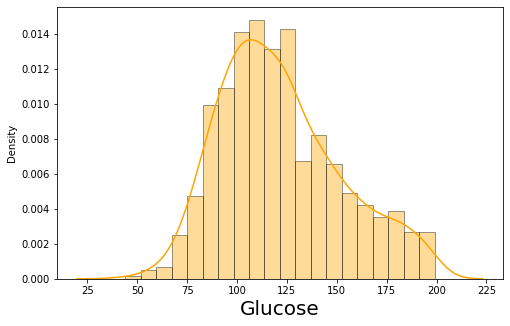

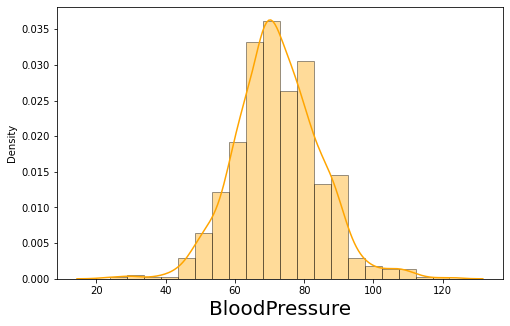

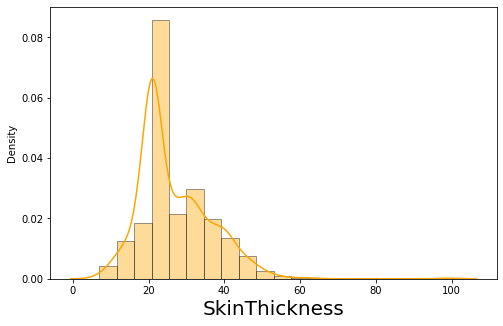

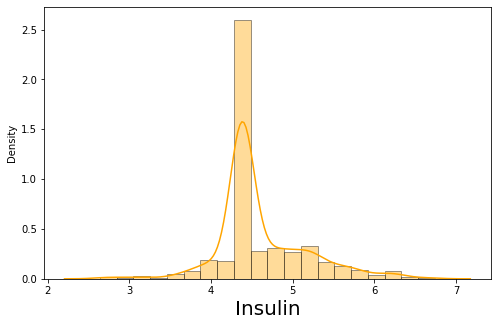

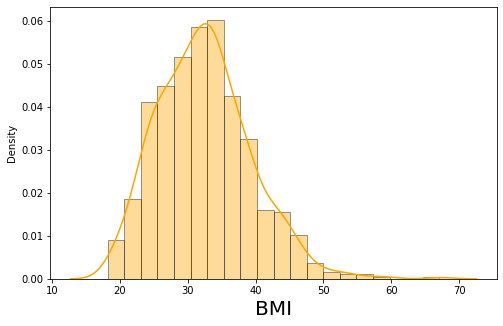

In [22]:
# Check the distribution of variables for which we performed zero value imputation and log transformation
for i in missing_val:
    distplot(1,1,8,5, data = df_copy, features = i,kde = True,
         colors = 'orange',bins =20)

<h3 style= 'color:red'> Observations: </h3>

* As expected, there are no zero values in the data.
* We have also reduced the skewness

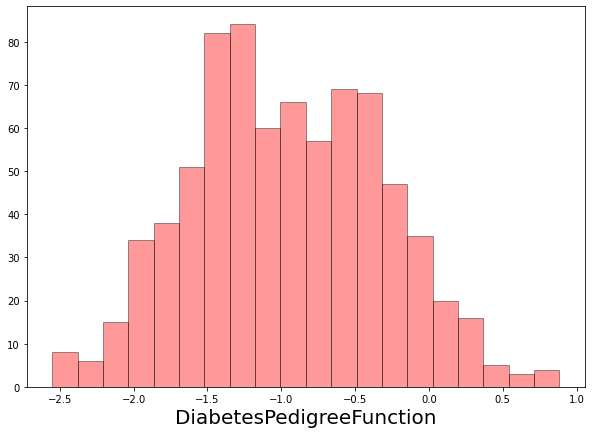

In [23]:
distplot(1,1,10,7, data = df_copy, features = 'DiabetesPedigreeFunction',kde = False,
         colors = 'red',bins =20)

# 3.a] Check balance of the data

<AxesSubplot:xlabel='Outcome', ylabel='count'>

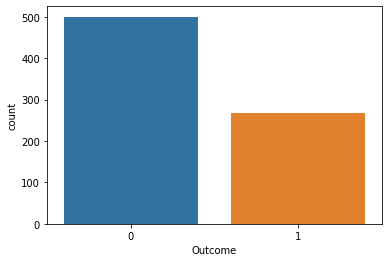

In [24]:
sns.countplot('Outcome',data =df_copy)

<h3 style= 'color:red'> Observations: </h3>

* The difference between the count of non-diabetic and diabetic patients is not negligible.
* Thus, our data is imbalanced.
* This helps in determining the evaluation metric for the model. 
* Since we have imbalanced data, we will use precision, recall and AUC score for evaluating performance of the models

In [25]:
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# Bivariate Analysis 

## 1. Outcome vs Preganancies 

In [26]:
# Pregnanices is a categorical feature. Its effect on the outcome can be analysed with crosstab
preg_vs_outcome = pd.crosstab(df_copy['Outcome'],df_copy['Pregnancies'],normalize ='columns')
preg_vs_outcome.T

Outcome,0,1
Pregnancies,,
0,0.657658,0.342342
1,0.785185,0.214815
2,0.815534,0.184466
3,0.640000,0.360000
4,0.661765,0.338235
5,0.631579,0.368421
6,0.680000,0.320000
7,0.444444,0.555556
8,0.421053,0.578947


<h3 style= 'color:red'> Observations: </h3>

* The outcome is affected by so many featrures. 
* In case of pregnancies, there is no clear boundary specifying the effect of pregnancies on outcome. 
* Till 6th pregnancy, the chances of diagnosing diabetes are lesser(less than 40%). 

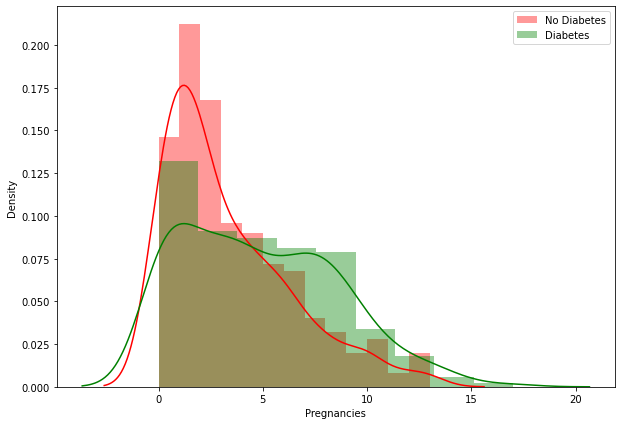

In [27]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['Pregnancies'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['Pregnancies'],color ='g',label = 'Diabetes')
plt.legend()
plt.show()

<h3 style= 'color:red'> Observations: </h3>

* Till 5th pregnancy, patient is less likely to get diagnosed with diabetes.
* After that the chances of getting diabetes are very high.

## 2. Outcome vs Age

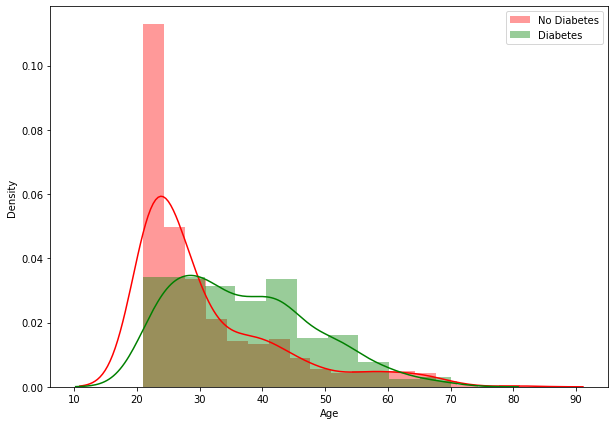

In [28]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['Age'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['Age'],color ='g',label = 'Diabetes')
plt.legend()
plt.show()

In [29]:
df_copy['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<h3 style= 'color:red'> Observations: </h3>

* The age range recorded is from 21 to 81.
* Patients in the age range 21-31 are less likely to get diabetes comapred to 30+ aged prople. 
* We can broadly make 4 age groups for further analysis.

In [30]:
'''
Convert age into 4 categories -> 
21 - 30 => Young
30 - 45 => Adults
45 - 65 => Mid-Aged
65 - 81 => Old
''' 
# make a copy of dataset for exploratory analysis purpose
df1 = df_copy.copy()
for i in range(0,len(df1['Age'])):
    if df1['Age'][i] <= 30:
        df1['Age'][i] = 'Young'
    elif 30 < df1['Age'][i] <= 45:
        df1['Age'][i] = 'Adult'
    elif 45 < df1['Age'][i] <= 65:
        df1['Age'][i] = 'Mid-Aged'
    else:
        df1['Age'][i] = 'Old'
df1['Age'].value_counts()

Young       417
Adult       233
Mid-Aged    105
Old          13
Name: Age, dtype: int64

In [31]:
outcome_vs_age = pd.crosstab(df1['Outcome'],df1['Age'],normalize = 'columns').T.reset_index()
outcome_vs_age.rename(columns = {0:'No Diabetes',1:'Diabetes'},inplace = True)
outcome_vs_age

Outcome,Age,No Diabetes,Diabetes
0,Adult,0.484979,0.515021
1,Mid-Aged,0.485714,0.514286
2,Old,0.692308,0.307692
3,Young,0.784173,0.215827


<h3 style= 'color:red'> Observations: </h3>

* As per the dataset that we have, 22% of the Young people detecetd with diabetes. 
* In case of old people, there is a 31% chance that the patient will get diabetes. This is quite absurd but the Outcome of People in this age group also depends upon other factors as well.
* Adult and Mid-Aged people had almost 50-50 chance of getting diabetes

## 3. Outcome vs Glucose level
* If you have diabetes, your pancreas either produces too little insulin or none at all. The insulin can't be used effectively. This allows blood glucose levels to rise while the rest of your cells are deprived of much-needed energy.
* So, Glucose and insulin level will help categories diabetic and non-diabetic patiencts significantly

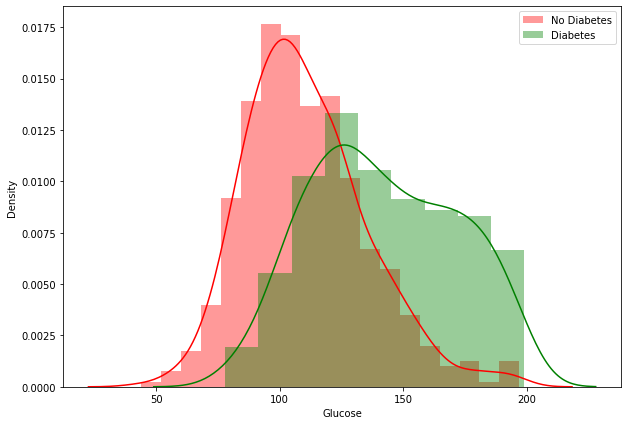

In [32]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['Glucose'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['Glucose'],color ='g',label = 'Diabetes')
plt.legend()
plt.show()

<h3 style= 'color:red'> Observations: </h3>

* As per the available data, patients with Plasma glucose concentration in an oral glucose tolerance test approx. less than 140 are less likely to have diabetes
* Some exceptions are still there in the range 100 - 140  where people were diagnosed with diabetes.

##  4. Outcome Vs BMI

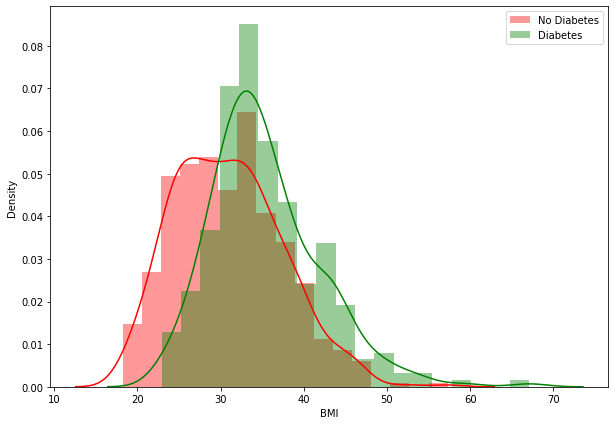

In [33]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['BMI'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['BMI'],color ='g',label = 'Diabetes')
plt.legend()

<h2 style ='color:red'> The BMI chart suggested by WHO: </h2>
<img src = 'bmi__WHO.jpg'>

<h3 style= 'color:red'> Observations: </h3>

* As per the normal BMI range set by WHO, and the data in hand, most of the patients who diagnosed with diabetes were either overweight or obese 
* People with normal range of BMI have lesser chance of getting diabetes

In [34]:
#We can create a new variable from BMI 

df2 = df_copy.copy()
df2['BMI_cat'] = df2['BMI']
for i in range(0,len(df2['BMI'])):
    if df2['BMI'][i] < 18.5:
        df2['BMI_cat'][i] = 'Underweight'
    
    elif 18.5 <= df2['BMI'][i] <= 24.9:
        df2['BMI_cat'][i] = 'Normal'
    
    elif 25.0 <= df2['BMI'][i] <= 29.9:
        df2['BMI_cat'][i] = 'Overweight'
    
    elif df2['BMI'][i] >= 30:
        df2['BMI_cat'][i] = 'Obese'
        
df2['BMI_cat'].value_counts()

Obese          483
Overweight     179
Normal         102
Underweight      4
Name: BMI_cat, dtype: int64

In [35]:
outcome_vs_bmi = pd.crosstab(df2['Outcome'],df2['BMI_cat'],normalize = 'columns').T.reset_index()
outcome_vs_bmi.rename(columns = {0:'No Diabetes',1:'Diabetes'},inplace = True)
outcome_vs_bmi

Outcome,BMI_cat,No Diabetes,Diabetes
0,Normal,0.931373,0.068627
1,Obese,0.542443,0.457557
2,Overweight,0.776536,0.223464
3,Underweight,1.000000,0.000000


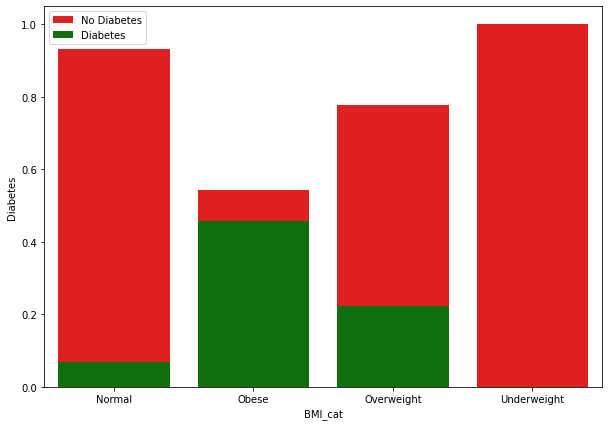

In [36]:
plt.figure(figsize = (10,7))
sns.barplot(outcome_vs_bmi['BMI_cat'],outcome_vs_bmi['No Diabetes'],color = 'r',label = 'No Diabetes')
sns.barplot(outcome_vs_bmi['BMI_cat'],outcome_vs_bmi['Diabetes'],color = 'g',label = 'Diabetes')
plt.legend()

<h3 style= 'color:red'> Observations: </h3>

* Out of 768 records, none of the underweight patient was diagnosed with a diabetes.
* 7% of the patients with normal BMI, diagnosed with diabetes.
* 22% of the overweight, diagnosed with diabetes.
* As expected, Obase patients has maximum percentage of 46% of having diabetes.

## 5. Outcome Vs BloodPressure 

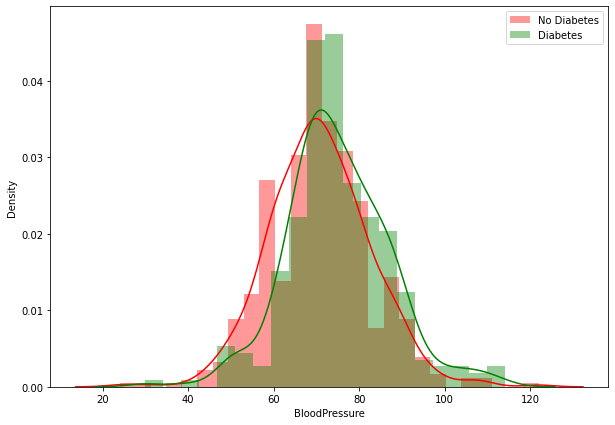

In [37]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['BloodPressure'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['BloodPressure'],color ='g',label = 'Diabetes')
plt.legend()

<h3 style= 'color:red'> Observations: </h3>

* It looks like blood pressure is not directly related in classifying whether the patient will get diabetes.

## 6. Outcome Vs SkinThickness 

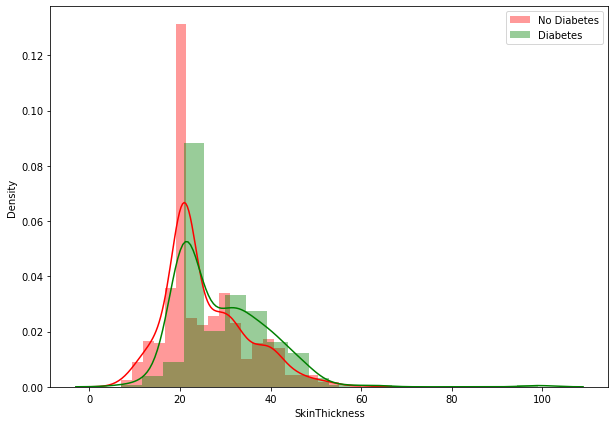

In [38]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['SkinThickness'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['SkinThickness'],color ='g',label = 'Diabetes')
plt.legend()

<h3 style= 'color:red'> Observations: </h3>

* From the above graph, it seems there is no direct relationship between skin thickness and diabetes

## 7. Outcome vs Insulin 

* Two hour serum insulin test measures the amount of insulin in your blood.


* This 2 hour Glucose Tolerance Test with Insulin levels is **used to assess how an individual processes glucose and how the insulin in the body responds to those glucose levels.** 

* This test is typically ordered when an individual may be at risk for diabetes or has had elevated glucose levels previously.

**What do the results mean?**

If your insulin levels were too high, it may mean you have:

* Type 2 diabetes
* Insulin resistance
* Hypoglycemia
* Cushing's syndrome, a disorder of the adrenal glands. Adrenal glands make hormones that help the body break down fat and protein.
* An insulinoma (pancreatic tumor)

If insulin levels were too low, it may mean you have:

* Hyperglycemia (high blood sugar)
* Type 1 diabetes
* Pancreatitis, an inflammation of the pancreas

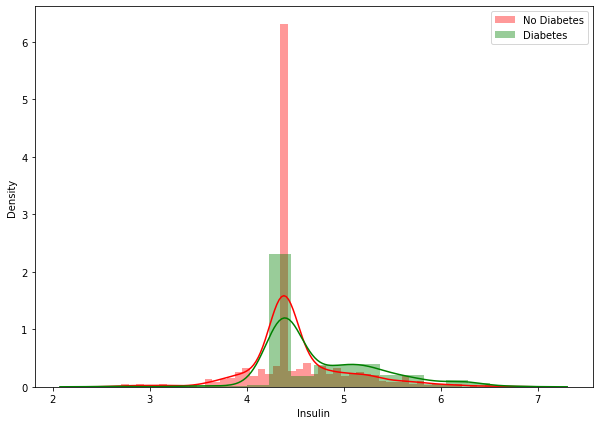

In [39]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['Insulin'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['Insulin'],color ='g',label = 'Diabetes')
plt.legend()

* The unit for the Insulin variable is not given. Thus, its quite difficult to decide whether the insulin in within the normal rane or out of range

* But insulin is directly related to the presence or absence of diabetes. So, we will make sure that this variable is ther in our prediction model

*Normal range of 2 hours after glucose administration is*	**16-166 mIU/L** 

In [40]:
df_copy['Insulin'].describe()

count    768.000000
mean       4.600579
std        0.543765
min        2.639057
25%        4.382027
50%        4.382027
75%        4.846148
max        6.740519
Name: Insulin, dtype: float64

##  8. Outcome vs DiabetesPedigreeFunction 

*Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)* 

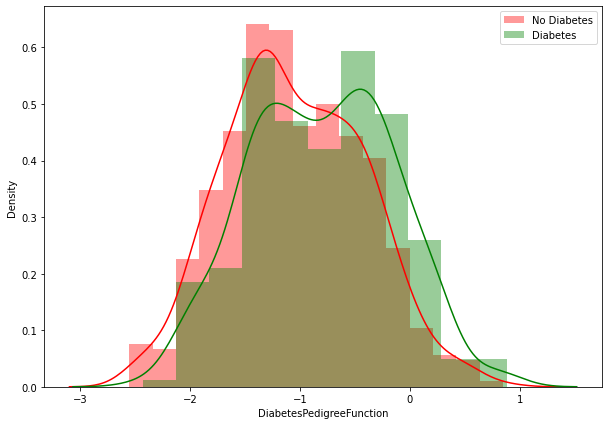

In [41]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['DiabetesPedigreeFunction'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['DiabetesPedigreeFunction'],color ='g',label = 'Diabetes')
plt.legend()

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) 


<h3 style= 'color:red'> Observations: </h3>

* If the function value is higher than -1 then the patient is more likely to get diabetes
* If the function value is less than -1 then there are less chances of getting diabetes

# Relationship between features 

## 1. Correlation Analysis: 

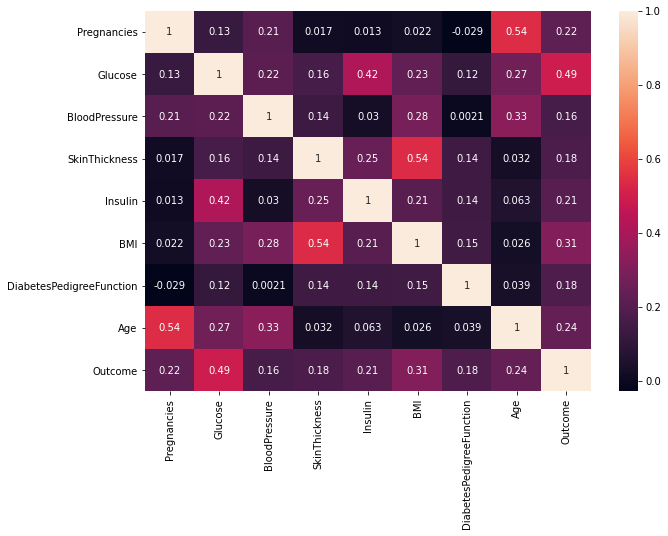

In [42]:
corr = df_copy.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot = True)
plt.savefig('correlation_matrix.jpg')

<h3 style= 'color:red'> Observations: </h3>

* Age and pregnanies have moderate correlation, which is quite obvious
* BMI and skinthickness also has moderate correlation
* Insulin and Glucose also has moderate correlation, which is also obvious, as discussed before

## 2. To find the relation between the features, we will plot pairplot :

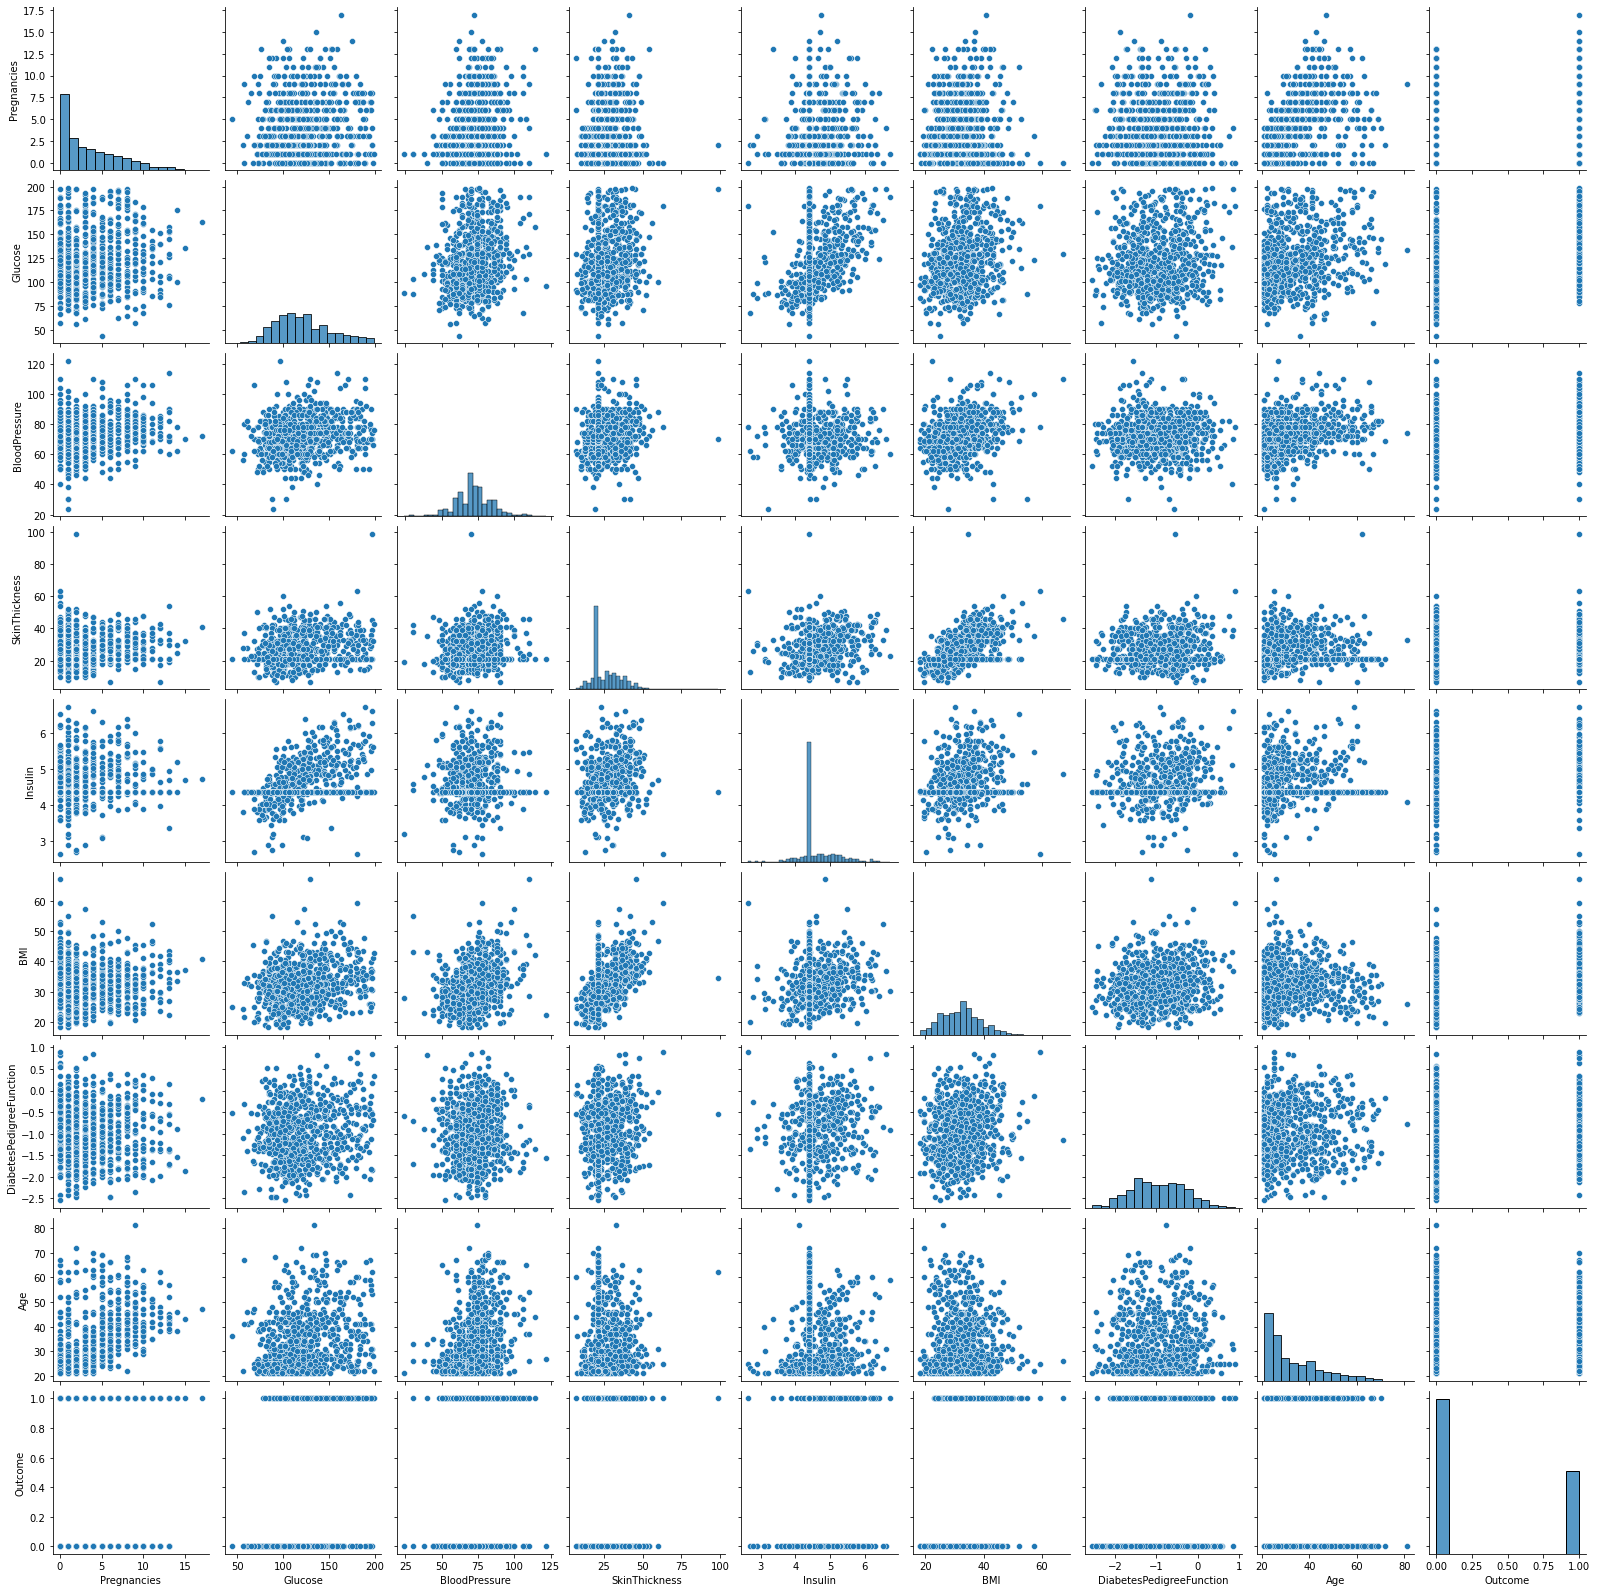

In [43]:
sns.pairplot(df_copy)

## 3. Glucose Vs. Insulin

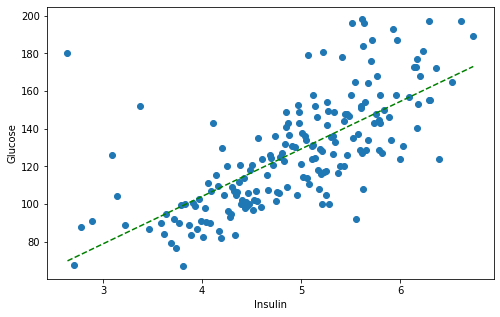

In [44]:
#We have ceted a new variable based on different bmi values 
data = pd.DataFrame(df_copy['Glucose'].groupby(df_copy['Insulin']).mean()).reset_index()
x = data['Insulin']
y = data['Glucose']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Insulin')
plt.ylabel('Glucose')

plt.show()

<h3 style= 'color:red'> Observations: </h3>

* We see somewhat linear relationship between Glucose and Insulin
* Glucose level increase with increase in Insulin

## 4. BMI Vs. SkinThickness

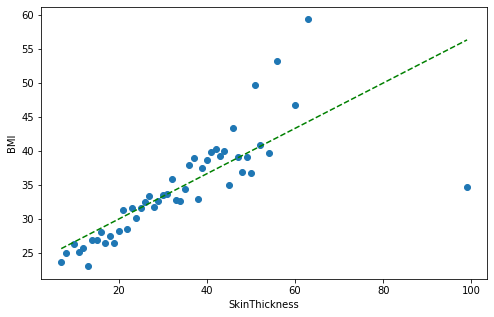

In [45]:
#We have ceted a new variable based on different bmi values 
data = pd.DataFrame(df_copy['BMI'].groupby(df_copy['SkinThickness']).mean()).reset_index()
x = data['SkinThickness']
y = data['BMI']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')

plt.show()

<h3 style= 'color:red'> Observations: </h3>

* For skinthickness and BMI, there is also a linear relationship
* BMI increases with increase in SkinThickness

## 5. Age Vs. BloodPressure

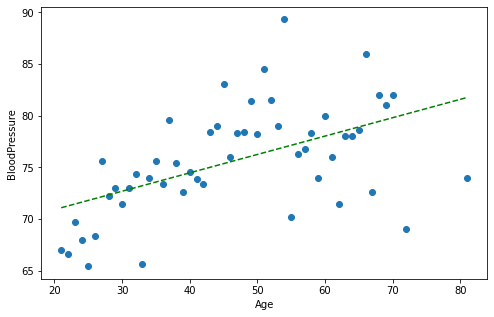

In [46]:
data = pd.DataFrame(df_copy['BloodPressure'].groupby(df_copy['Age']).mean()).reset_index()
x = data['Age']
y = data['BloodPressure']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Age')
plt.ylabel('BloodPressure')

plt.show()

<h3 style= 'color:red'> Observations: </h3>

* Overall blood pressure increase with increase in Age.

## 6. Age vs. Pregnancies

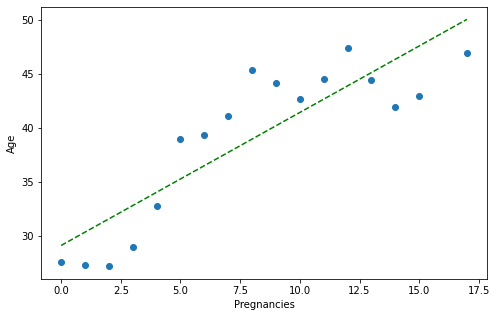

In [47]:
data = pd.DataFrame(df_copy['Age'].groupby(df_copy['Pregnancies']).mean()).reset_index()
x = data['Pregnancies']
y = data['Age']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Pregnancies')
plt.ylabel('Age')

plt.show()

**As expected mean age increases with increase in no. of pregnancies**

## 7. Pregnancies Vs. Glucose

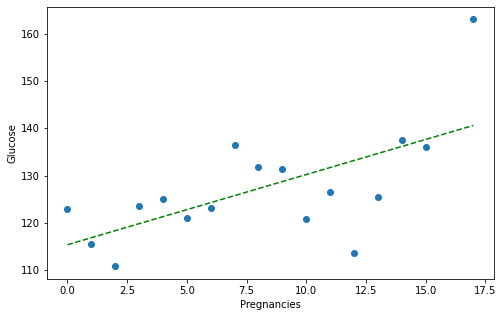

In [48]:
data = pd.DataFrame(df_copy['Glucose'].groupby(df_copy['Pregnancies']).mean()).reset_index()
x = data['Pregnancies']
y = data['Glucose']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')

plt.show()

## 8. SkinThickness Vs. Age 

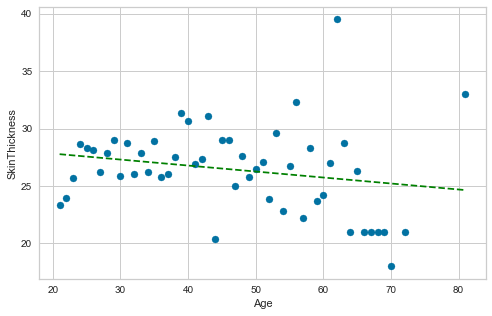

In [120]:
data = pd.DataFrame(df_copy['SkinThickness'].groupby(df_copy['Age']).mean()).reset_index()
x = data['Age']
y = data['SkinThickness']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Age')
plt.ylabel('SkinThickness')

plt.show()

<h3 style= 'color:red'> Observations: </h3>

* Skinfold thicknesses measure subcutaneous body fat and, therefore, indicate body composition.
* As expected, skin thickness decreases with age.
* For normal women, skinfold thickness in the range 91-100 is considered good.

In [49]:
# Save the preprocessed data to a file, for further processing in tbleau
df_copy.to_csv("Diabetes data.csv")

# Data Modeling:

In [50]:
x = df_copy.drop(['Outcome'],axis=1)
y = df_copy['Outcome']
seed = 2021

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =seed)

In [52]:
printmd("**Shape of x_train : "+str(x_train.shape)+"**",color = 'brown')
printmd("**Shape of y_train : "+str(y_train.shape)+"**",color = 'brown')
printmd("**Shape of x_test : "+str(x_test.shape)+"**",color = 'brown')
printmd("**Shape of y_test : "+str(y_test.shape)+"**",color = 'brown')

<span style='color:brown'>**Shape of x_train : (614, 8)**</span>

<span style='color:brown'>**Shape of y_train : (614,)**</span>

<span style='color:brown'>**Shape of x_test : (154, 8)**</span>

<span style='color:brown'>**Shape of y_test : (154,)**</span>

## 1. Logistic Regression :

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

In [54]:
lr = LogisticRegression(random_state = seed,max_iter=1000)

In [55]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2021, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
ypred_test1 = lr.predict(x_test)
ypred_train1 = lr.predict(x_train)

Text(0.5, 0, 'Importance')

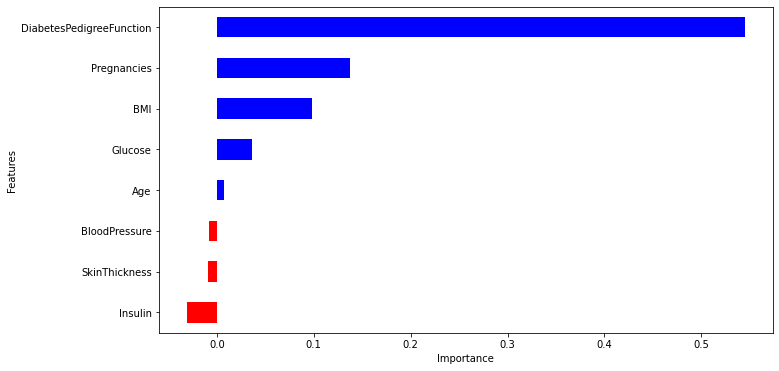

In [57]:
# Plot a bar chart indicating the importance of the features used in the model
coeff = list(lr.coef_[0])
labels = list(x_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

<h3 style= 'color:red'> Observations: </h3>

From above graph we can draw following conclusions - 
* DiabetesPdigreeFuction,Pregnancies,BMI and Glucose have significant influence on model.
* Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic.
* Insulin also has negative influence and have a magnitude same as that of Glucose, which is quite obvious

In [58]:
#visualize performance report
def Performance_report(model,x_train,y_train,x_test,y_test,draw_roc = False):
    viz = ClassificationReport(model,classes = ['No Diabetes','Diabetes'])
    viz.fit(x_train,y_train)
    viz.score(x_test,y_test)
    viz.show();
    
    if draw_roc == True:
        roc = ROCAUC(model,classes = ['No Diabetes','Diabetes'])
        roc.fit(x_train,y_train)
        roc.score(x_test,y_test)
        roc.show();

In [59]:
print(classification_report(y_test,ypred_test1))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        97
           1       0.75      0.58      0.65        57

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [60]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test1))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train1))

confusion matrix for test data :
 [[86 11]
 [24 33]]
confusion matrix for train data :
 [[354  49]
 [ 95 116]]


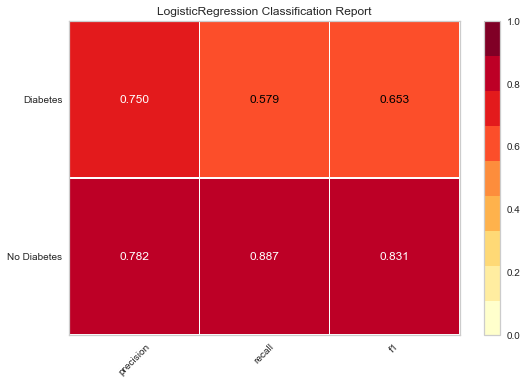

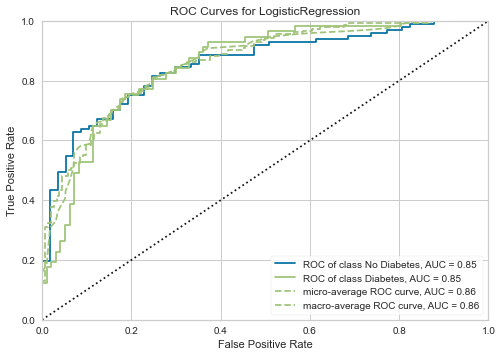

In [61]:
from yellowbrick.classifier import ClassificationReport,ROCAUC
from yellowbrick.classifier.rocauc import roc_auc
Performance_report(model = lr,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

<h3 style= 'color:red'> Observations: </h3>

* The sensitivity/recall means "how many of this class you find over the whole number of element of this class"

* The precision will be "how many are correctly classified among that class"

* The f1-score is the harmonic mean between precision & recall

* The support is the number of occurence of the given class in your dataset. We got support of 97 for class 0 and 57 for class 1. This also implies that our dataset is imbalanced.
* In such cases precision and recall is better matrix to determine the accuracy of the model

* Using logistic regression we got a 
    - Precision as 78% and recall as 89% for predicting diabetic patients
    - Precision as 75% and recall as 58% for predicting non-diabetic patients
    
**Thus, Logistic regression is better to find class 0 over class 1**

* From the AUCROC curve, we got AUC of 0.85.
* When AUC is 0.85, it means there is a 85% chance that the model will be able to distinguish between positive class and negative class.



In [62]:
# we will create a datafram to record and compare precision and recall of both the classes for each model
dict = {'Model Name':['Logistic Regression'],
        'Precision_no_diabetes':[0.78],
        'Precision_diabetes':[0.75],
        'Recall_no_diabetes':[0.89],
        'Recall_diabetes':[0.58],
        'AUC':[0.85]
       }
result = pd.DataFrame(dict)
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85


# 2. Decision Tree Classifier :

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
clf = DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 1,random_state = seed)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

Pregnancies                 0.029146
Glucose                     0.537124
BloodPressure               0.016257
SkinThickness               0.019361
Insulin                     0.000000
BMI                         0.234443
DiabetesPedigreeFunction    0.023335
Age                         0.140334
dtype: float64

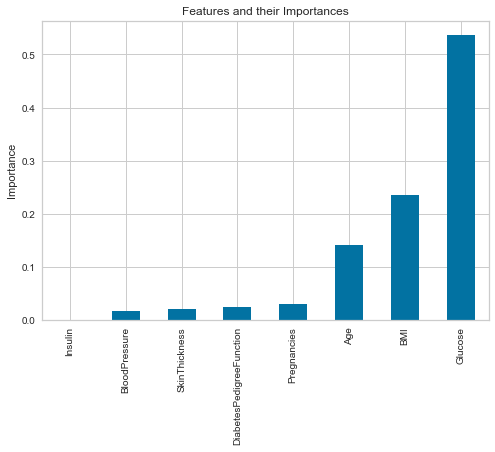

In [65]:
#Feature Importances for Decision Tree Classifier
feature_imp = pd.Series(clf.feature_importances_, index = x_train.columns)
feature_imp.sort_values().plot(kind = 'bar')
plt.ylabel('Importance')
plt.title("Features and their Importances")
feature_imp

<h3 style= 'color:red'> Observations: </h3>

* Glucose, BMI and Age has highest significance in classifying the diabetic and non-diabetic patients with decision tree classifier
* Insulin is not significant for decision tree.

In [66]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

In [67]:
ypred_test2 = clf.predict(x_test)
ypred_train2 = clf.predict(x_train)
print(classification_report(y_test,ypred_test2))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        97
           1       0.62      0.68      0.65        57

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.73      0.73       154



confusion matrix for test data :
 [[73 24]
 [18 39]]
confusion matrix for train data :
 [[324  79]
 [ 40 171]]


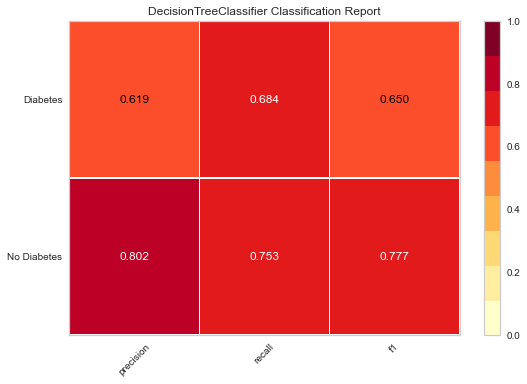

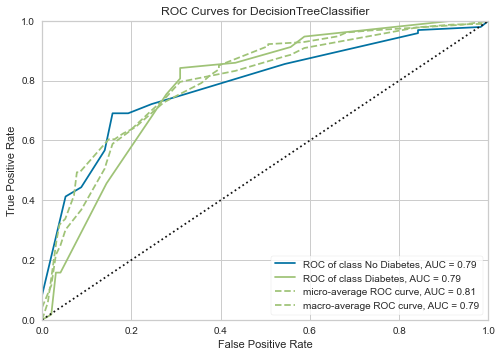

In [68]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test2))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train2))
Performance_report(model = clf,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [69]:
# Append a row of decision tree output in the result dataframe
result.loc[len(result.index)] = ['Decision Tree Classifier',0.8,0.61,0.75,0.68,0.79]
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79


<h3 style= 'color:red'> Observations: </h3>

* Using Decision tree classifier we got - 
    - Precision as 80% and recall as 75% for classifying non-diabetic patients
    - Precision as 61% and recall as 68% for classifying diabetic patients
* Decision tree is better in identifying diabetic over non-diabetic. 
* The decision tree doesn't perform very well in prediting diabetic patients from entire data(Recall -> 0.75 for non-diabetic and 0.68 for diabetic classification). 
* However, Decision tree classifies diabetic patiencts more precisely than non-diabetic. It also classifies non-diabetic patients more precisely than logistic regression.
* From AUCROC curve, we got AUC of 0.79
* When AUC is 0.79, it means there is a 79% chance that the model will be able to distinguish between positive class and negative class.


# 3. RandomForest Classifier : 

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators=1000, random_state = seed,max_depth = 10)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

Pregnancies                 0.082664
Glucose                     0.258904
BloodPressure               0.079100
SkinThickness               0.066971
Insulin                     0.082230
BMI                         0.162421
DiabetesPedigreeFunction    0.124718
Age                         0.142993
dtype: float64

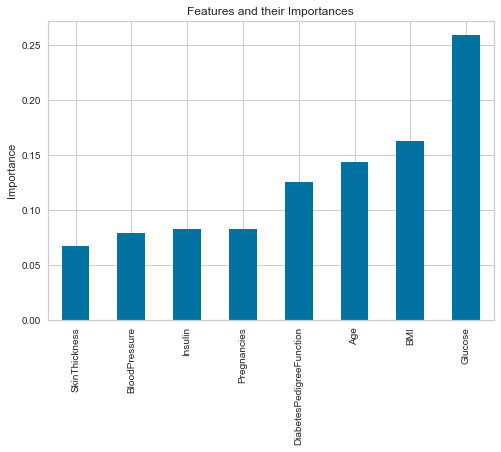

In [71]:
#Feature Importances for Random Forest Classifier
feature_imp = pd.Series(rfc.feature_importances_, index = x_train.columns)
feature_imp.sort_values().plot(kind = 'bar')
plt.ylabel('Importance')
plt.title("Features and their Importances")
feature_imp

<h3 style= 'color:red'> Observations: </h3>

* For random forest classifier, all features are significant.
* Glucose, BMI, Age and DiabetesPedigreeFunction has highest importance

In [72]:
rfc.feature_importances_[rfc.feature_importances_<0.08]

array([0.07909994, 0.06697052])

In [73]:
ypred_test3 = rfc.predict(x_test)
ypred_train3 = rfc.predict(x_train)
print(classification_report(y_test,ypred_test3))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        97
           1       0.74      0.60      0.66        57

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



confusion matrix for test data :
 [[85 12]
 [23 34]]
confusion matrix for train data :
 [[403   0]
 [  1 210]]


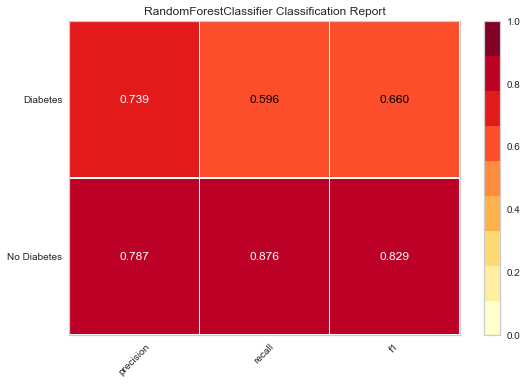

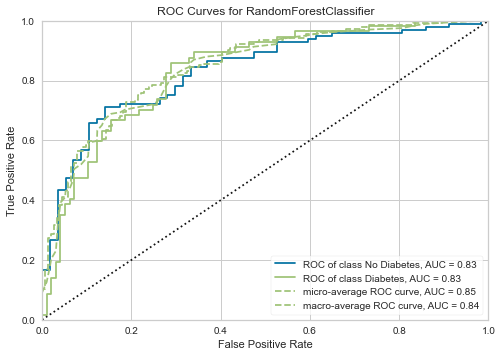

In [74]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test3))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train3))
Performance_report(model = rfc,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [75]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['Random Forest Classifier',0.77,0.7,0.86,0.58,0.83]
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79
2,Random Forest Classifier,0.77,0.70,0.86,0.58,0.83


<h3 style= 'color:red'> Observations: </h3>

* Using Random forest classifier we got - 
    - Precision as 77% and recall as 86% for Non-diabetic class
    - Precision as 70% and recall as 58% for diabetic class
* Random forest is better in identifying non-diabetic over diabetic patients. 
* From AUCROC curve, we got AUC of 0.83
* When AUC is 0.83, it means there is a 83% chance that the model will be able to distinguish between positive class and negative class.


# 4. SVM :

In [76]:
from sklearn.svm import SVC
svc = SVC(random_state = seed)

In [77]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=2021, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
ypred_test4 = svc.predict(x_test)
ypred_train4 = svc.predict(x_train)
print(classification_report(y_test,ypred_test4))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        97
           1       0.81      0.46      0.58        57

    accuracy                           0.76       154
   macro avg       0.78      0.70      0.71       154
weighted avg       0.77      0.76      0.74       154



In [79]:
from sklearn import metrics

confusion matrix for test data :
 [[91  6]
 [31 26]]
confusion matrix for train data :
 [[366  37]
 [113  98]]


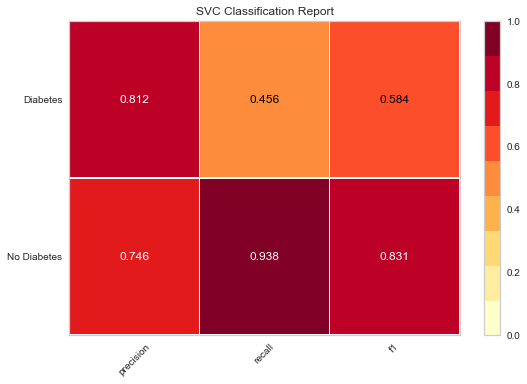

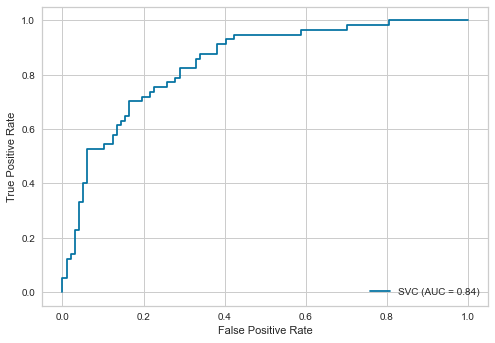

In [80]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test4))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train4))
Performance_report(model = svc,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = False)
metrics.plot_roc_curve(svc,x_test,y_test)
plt.show()

In [81]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['Support Vector Classifier',0.75,0.81,0.94,0.46,0.84]
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79
2,Random Forest Classifier,0.77,0.70,0.86,0.58,0.83
3,Support Vector Classifier,0.75,0.81,0.94,0.46,0.84


<h3 style= 'color:red'> Observations: </h3>

* Using Support Vector classifier we got - 
    - Precision as 75% and recall as 94% for Non-diabetic class
    - Precision as 81% and recall as 46% for diabetic class 
* From AUCROC curve, we got AUC of 0.84
* When AUC is 0.84, it means there is a 84% chance that the model will be able to distinguish between positive class and negative class.
* The SVC model classifies diabetic and non diabetic patients with almost same precision.
* Sensitivity(Recall) is higher for non-diabetic class .
* High sensitivity implies that if any person who has the disease is likely to be classified as positive by the test. 
* On the other hand, if the specificity is high, any person who does not have the disease is likely to be classified as negative by the test.

# 5. Naive Bayes : 

In [82]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()

In [83]:
naive.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [84]:
ypred_test5 = naive.predict(x_test)
ypred_train5 = naive.predict(x_train)
print(classification_report(y_test,ypred_test5))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        97
           1       0.71      0.60      0.65        57

    accuracy                           0.76       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.76      0.75       154



confusion matrix for test data :
 [[83 14]
 [23 34]]
confusion matrix for train data :
 [[339  64]
 [ 83 128]]


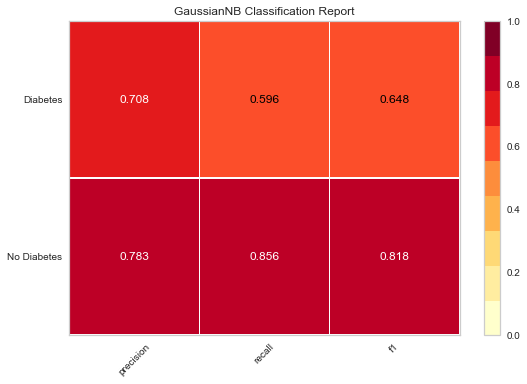

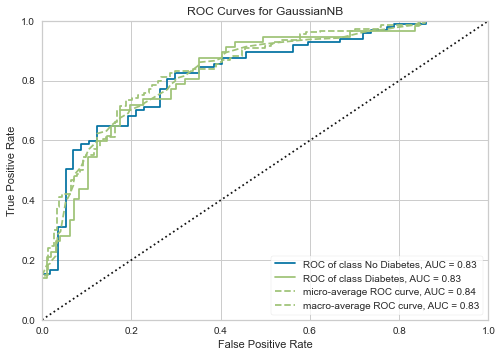

In [85]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test5))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train5))
Performance_report(model = naive,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [86]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['Naive Bayes Classifier',0.78,0.71,0.86,0.60,0.83]
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79
2,Random Forest Classifier,0.77,0.70,0.86,0.58,0.83
3,Support Vector Classifier,0.75,0.81,0.94,0.46,0.84
4,Naive Bayes Classifier,0.78,0.71,0.86,0.60,0.83


<h3 style= 'color:red'> Observations: </h3>

* Using Naive Bayes classifier we got - 
    - Precision as 78% and recall as 86% for Non-diabetic class
    - Precision as 71% and recall as 60% for diabetic class 
* From AUCROC curve, we got AUC of 0.83
* When AUC is 0.83, it means there is a 83% chance that the model will be able to distinguish between positive class and negative class.
* The naive bayes model classifies diabetic and non diabetic patients with almost same precision. i.e if the patient has diabetes, he will be classified as positive with a precision of 81% out of all the predictions made by the model.
* Sensitivity(Recall) is higher for non-diabetic predictions . Thus, the model identifies non diabetic patients more clearly than diabtic patients. However, all the predictions are made with more or less same precision. 

# 6. KNN Classifier : 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [88]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [89]:
ypred_test6 = knn.predict(x_test)
ypred_train6 = knn.predict(x_train)
print(classification_report(y_test,ypred_test6))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        97
           1       0.68      0.49      0.57        57

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



confusion matrix for test data :
 [[84 13]
 [29 28]]
confusion matrix for train data :
 [[381  22]
 [ 96 115]]


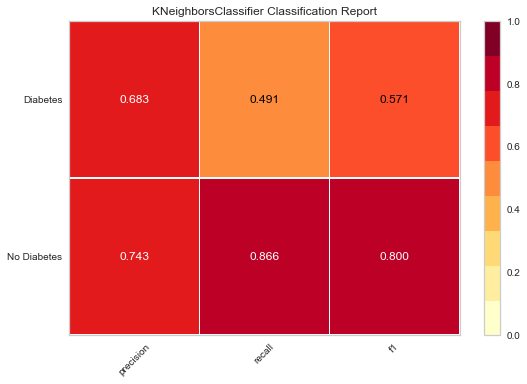

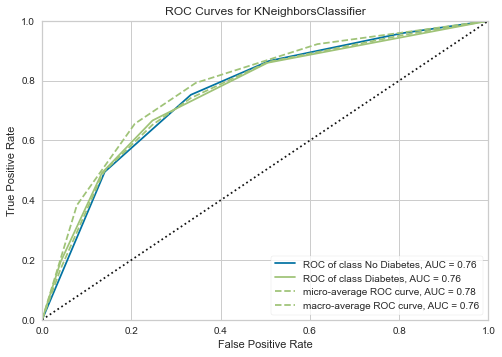

In [90]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test6))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train6))
Performance_report(model = knn,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [91]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['KNeighbors Classifier',0.74,0.68,0.87,0.49,0.76]
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79
2,Random Forest Classifier,0.77,0.70,0.86,0.58,0.83
3,Support Vector Classifier,0.75,0.81,0.94,0.46,0.84
4,Naive Bayes Classifier,0.78,0.71,0.86,0.60,0.83
5,KNeighbors Classifier,0.74,0.68,0.87,0.49,0.76


<h3 style= 'color:red'> Observations: </h3>

* Using K-Neighbors classifier we got - 
    - Precision as 74% and recall as 87% for Non-diabetic class
    - Precision as 68% and recall as 49% for diabetic class 
* From AUCROC curve, we got AUC of 0.76
* When AUC is 0.76, it means there is a 76% chance that the model will be able to distinguish between positive class and negative class.
* This is the lowest AUC value we got till now, using KNN. Low AUC value indicates weak capacity of model in distinguishing the two classes. 
* The model classifies diabetic and non diabetic patients with almost same precision.
* Sensitivity(Recall) is higher for prediction of non diabetic patients. Thus, if a patient doesn't have diabetes, out of all the actual non-diabetic patients, the model will identify 87% of the non-diabetic patients
* If a patient has diabetes, then out of all the predictions made, 49% are classified as diabetic. 

# 7. XGB Classifier

In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = seed,n_estimators=50)

In [93]:
xgb.fit(x_train,y_train)

[20:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=2021, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [94]:
ypred_test7 = xgb.predict(x_test)
ypred_train7 = xgb.predict(x_train)
print(classification_report(y_test,ypred_test7))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        97
           1       0.68      0.67      0.67        57

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



confusion matrix for test data :
 [[79 18]
 [19 38]]
confusion matrix for train data :
 [[403   0]
 [  0 211]]


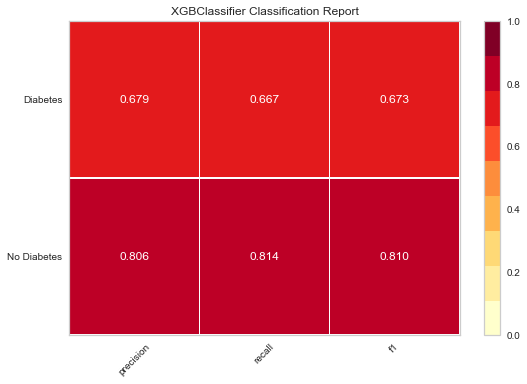

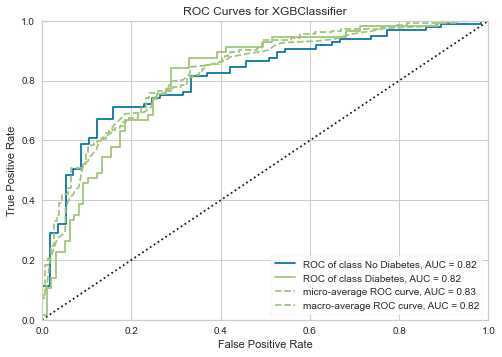

In [95]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test7))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train7))
Performance_report(model = xgb,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [96]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['XGBoost Classifier',0.80,0.68,0.81,0.67,0.82]
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79
2,Random Forest Classifier,0.77,0.70,0.86,0.58,0.83
3,Support Vector Classifier,0.75,0.81,0.94,0.46,0.84
4,Naive Bayes Classifier,0.78,0.71,0.86,0.60,0.83
5,KNeighbors Classifier,0.74,0.68,0.87,0.49,0.76
6,XGBoost Classifier,0.80,0.68,0.81,0.67,0.82


<h3 style= 'color:red'> Observations: </h3>

* Using XGboost classifier we got - 
    - Precision as 80% and recall as 81% for Non-diabetic class
    - Precision as 68% and recall as 67% for diabetic class 
* From AUCROC curve, we got AUC of 0.82
* When AUC is 0.82, it means there is a 82% chance that the model will be able to distinguish between positive class and negative class.
* The model is identical to decision tree with improved classifying power(since base learners in xgboost are decisoon trees) 

# 8. Catboost Classifier

In [97]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier(random_state = seed)

In [98]:
catb.fit(x_train,y_train)

Learning rate set to 0.008365
0:	learn: 0.6881129	total: 159ms	remaining: 2m 39s
1:	learn: 0.6834966	total: 169ms	remaining: 1m 24s
2:	learn: 0.6795951	total: 176ms	remaining: 58.3s
3:	learn: 0.6747145	total: 178ms	remaining: 44.3s
4:	learn: 0.6701557	total: 181ms	remaining: 36s
5:	learn: 0.6664486	total: 183ms	remaining: 30.4s
6:	learn: 0.6629925	total: 186ms	remaining: 26.4s
7:	learn: 0.6592622	total: 188ms	remaining: 23.4s
8:	learn: 0.6556691	total: 191ms	remaining: 21s
9:	learn: 0.6528714	total: 194ms	remaining: 19.2s
10:	learn: 0.6483070	total: 196ms	remaining: 17.6s
11:	learn: 0.6448294	total: 198ms	remaining: 16.3s
12:	learn: 0.6423040	total: 201ms	remaining: 15.3s
13:	learn: 0.6387676	total: 205ms	remaining: 14.4s
14:	learn: 0.6353635	total: 208ms	remaining: 13.7s
15:	learn: 0.6321666	total: 211ms	remaining: 13s
16:	learn: 0.6294145	total: 213ms	remaining: 12.3s
17:	learn: 0.6264653	total: 215ms	remaining: 11.7s
18:	learn: 0.6226245	total: 218ms	remaining: 11.2s
19:	learn: 0.62

199:	learn: 0.3968238	total: 647ms	remaining: 2.59s
200:	learn: 0.3963994	total: 649ms	remaining: 2.58s
201:	learn: 0.3959493	total: 652ms	remaining: 2.58s
202:	learn: 0.3955282	total: 654ms	remaining: 2.57s
203:	learn: 0.3950839	total: 657ms	remaining: 2.56s
204:	learn: 0.3943941	total: 659ms	remaining: 2.56s
205:	learn: 0.3940662	total: 662ms	remaining: 2.55s
206:	learn: 0.3937088	total: 664ms	remaining: 2.54s
207:	learn: 0.3931233	total: 666ms	remaining: 2.54s
208:	learn: 0.3924589	total: 669ms	remaining: 2.53s
209:	learn: 0.3917782	total: 672ms	remaining: 2.53s
210:	learn: 0.3913438	total: 675ms	remaining: 2.52s
211:	learn: 0.3906993	total: 677ms	remaining: 2.52s
212:	learn: 0.3902480	total: 680ms	remaining: 2.51s
213:	learn: 0.3896641	total: 682ms	remaining: 2.5s
214:	learn: 0.3890680	total: 684ms	remaining: 2.5s
215:	learn: 0.3886398	total: 687ms	remaining: 2.49s
216:	learn: 0.3881999	total: 689ms	remaining: 2.49s
217:	learn: 0.3877054	total: 691ms	remaining: 2.48s
218:	learn: 0.

402:	learn: 0.3238923	total: 1.13s	remaining: 1.67s
403:	learn: 0.3237252	total: 1.13s	remaining: 1.66s
404:	learn: 0.3235071	total: 1.13s	remaining: 1.66s
405:	learn: 0.3229775	total: 1.13s	remaining: 1.66s
406:	learn: 0.3223205	total: 1.14s	remaining: 1.65s
407:	learn: 0.3221291	total: 1.14s	remaining: 1.65s
408:	learn: 0.3219447	total: 1.14s	remaining: 1.65s
409:	learn: 0.3215029	total: 1.14s	remaining: 1.65s
410:	learn: 0.3212362	total: 1.15s	remaining: 1.64s
411:	learn: 0.3210377	total: 1.15s	remaining: 1.64s
412:	learn: 0.3208707	total: 1.15s	remaining: 1.64s
413:	learn: 0.3207478	total: 1.16s	remaining: 1.64s
414:	learn: 0.3205053	total: 1.16s	remaining: 1.63s
415:	learn: 0.3202873	total: 1.16s	remaining: 1.63s
416:	learn: 0.3201030	total: 1.16s	remaining: 1.63s
417:	learn: 0.3198517	total: 1.17s	remaining: 1.62s
418:	learn: 0.3195935	total: 1.17s	remaining: 1.62s
419:	learn: 0.3193626	total: 1.17s	remaining: 1.62s
420:	learn: 0.3190625	total: 1.17s	remaining: 1.61s
421:	learn: 

612:	learn: 0.2752310	total: 1.61s	remaining: 1.01s
613:	learn: 0.2749792	total: 1.61s	remaining: 1.01s
614:	learn: 0.2748775	total: 1.61s	remaining: 1.01s
615:	learn: 0.2746092	total: 1.62s	remaining: 1.01s
616:	learn: 0.2743993	total: 1.62s	remaining: 1s
617:	learn: 0.2742729	total: 1.62s	remaining: 1s
618:	learn: 0.2742510	total: 1.63s	remaining: 1s
619:	learn: 0.2740194	total: 1.63s	remaining: 998ms
620:	learn: 0.2738306	total: 1.63s	remaining: 996ms
621:	learn: 0.2736536	total: 1.63s	remaining: 994ms
622:	learn: 0.2733626	total: 1.64s	remaining: 991ms
623:	learn: 0.2731549	total: 1.64s	remaining: 989ms
624:	learn: 0.2728156	total: 1.64s	remaining: 986ms
625:	learn: 0.2727047	total: 1.65s	remaining: 983ms
626:	learn: 0.2724913	total: 1.65s	remaining: 980ms
627:	learn: 0.2723537	total: 1.65s	remaining: 977ms
628:	learn: 0.2723002	total: 1.65s	remaining: 975ms
629:	learn: 0.2722011	total: 1.65s	remaining: 972ms
630:	learn: 0.2721048	total: 1.66s	remaining: 969ms
631:	learn: 0.2719117

821:	learn: 0.2367193	total: 2.08s	remaining: 452ms
822:	learn: 0.2365881	total: 2.09s	remaining: 449ms
823:	learn: 0.2364976	total: 2.09s	remaining: 447ms
824:	learn: 0.2363164	total: 2.09s	remaining: 444ms
825:	learn: 0.2361433	total: 2.1s	remaining: 441ms
826:	learn: 0.2358927	total: 2.1s	remaining: 439ms
827:	learn: 0.2356576	total: 2.1s	remaining: 436ms
828:	learn: 0.2354891	total: 2.1s	remaining: 434ms
829:	learn: 0.2352066	total: 2.1s	remaining: 431ms
830:	learn: 0.2350083	total: 2.11s	remaining: 429ms
831:	learn: 0.2347426	total: 2.11s	remaining: 426ms
832:	learn: 0.2346922	total: 2.11s	remaining: 424ms
833:	learn: 0.2344465	total: 2.12s	remaining: 421ms
834:	learn: 0.2342503	total: 2.12s	remaining: 418ms
835:	learn: 0.2340808	total: 2.12s	remaining: 416ms
836:	learn: 0.2339465	total: 2.12s	remaining: 413ms
837:	learn: 0.2334907	total: 2.12s	remaining: 411ms
838:	learn: 0.2333925	total: 2.13s	remaining: 408ms
839:	learn: 0.2331751	total: 2.13s	remaining: 405ms
840:	learn: 0.232

In [99]:
ypred_test8 = catb.predict(x_test)
ypred_train8 = catb.predict(x_train)
print(classification_report(y_test,ypred_test8))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        97
           1       0.71      0.63      0.67        57

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



confusion matrix for test data :
 [[82 15]
 [21 36]]
confusion matrix for train data :
 [[396   7]
 [ 26 185]]


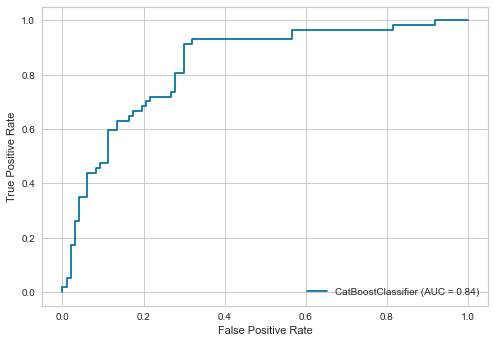

In [100]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test8))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train8))
metrics.plot_roc_curve(catb,x_test,y_test)

In [101]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['Catboost Classifier',0.80,0.71,0.85,0.63,0.84]
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79
2,Random Forest Classifier,0.77,0.70,0.86,0.58,0.83
3,Support Vector Classifier,0.75,0.81,0.94,0.46,0.84
4,Naive Bayes Classifier,0.78,0.71,0.86,0.60,0.83
5,KNeighbors Classifier,0.74,0.68,0.87,0.49,0.76
6,XGBoost Classifier,0.80,0.68,0.81,0.67,0.82
7,Catboost Classifier,0.80,0.71,0.85,0.63,0.84


<h3 style= 'color:red'> Observations: </h3>

* Using Catboost classifier we got - 
    - Precision as 80% and recall as 85% for Non-diabetic class
    - Precision as 71% and recall as 63% for diabetic class 
* From AUCROC curve, we got AUC of 0.84
* When AUC is 0.84, it means there is a 84% chance that the model will be able to distinguish between positive class and negative class.
* The model has higher precision and recall for both the classes. Such model can be cosidered as good classification model.

# 9. LGBM Classifier :

In [102]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state = seed,n_estimators=100,learning_rate=0.3)

In [103]:
lgbm.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [104]:
ypred_test9 = lgbm.predict(x_test)
ypred_train9 = lgbm.predict(x_train)
print(classification_report(y_test,ypred_test9))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        97
           1       0.66      0.68      0.67        57

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.75      0.75       154



confusion matrix for test data :
 [[77 20]
 [18 39]]
confusion matrix for train data :
 [[403   0]
 [  0 211]]


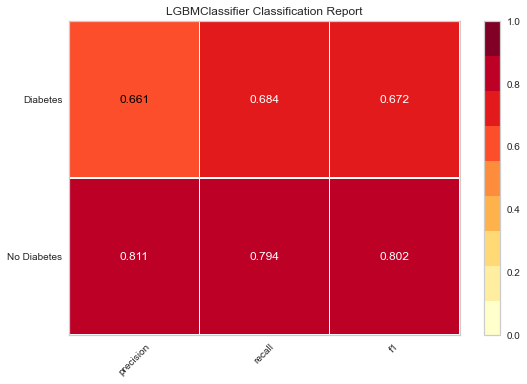

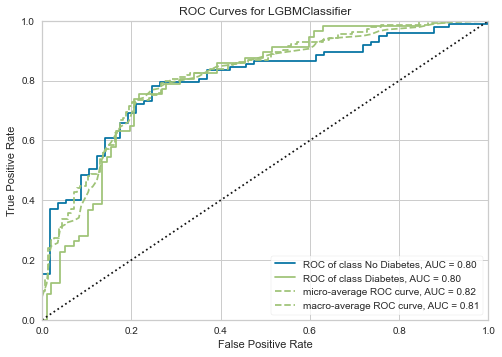

In [105]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test9))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train9))
Performance_report(model =lgbm,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [106]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['LightGbm Classifier',0.81,0.66,0.79,0.68,0.8]
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79
2,Random Forest Classifier,0.77,0.70,0.86,0.58,0.83
3,Support Vector Classifier,0.75,0.81,0.94,0.46,0.84
4,Naive Bayes Classifier,0.78,0.71,0.86,0.60,0.83
5,KNeighbors Classifier,0.74,0.68,0.87,0.49,0.76
6,XGBoost Classifier,0.80,0.68,0.81,0.67,0.82
7,Catboost Classifier,0.80,0.71,0.85,0.63,0.84
8,LightGbm Classifier,0.81,0.66,0.79,0.68,0.80


<h3 style= 'color:red'> Observations: </h3>

* Using Light GBM classifier we got - 
    - Precision as 81% and recall as 79% for Non-diabetic class
    - Precision as 66% and recall as 68% for diabetic class 
* From AUCROC curve, we got AUC of 0.80
* When AUC is 0.80, it means there is a 80% chance that the model will be able to distinguish between positive class and negative class.
* This model also has high precision and moderate recall. This model is also a good classifier for the problem in hand

# 10. GBM Classifier : 

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state = seed)

In [108]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2021, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
ypred_test10 = gbm.predict(x_test)
ypred_train10 = gbm.predict(x_train)
print(classification_report(y_test,ypred_test10))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        97
           1       0.72      0.63      0.67        57

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



confusion matrix for test data :
 [[83 14]
 [21 36]]
confusion matrix for train data :
 [[390  13]
 [ 36 175]]


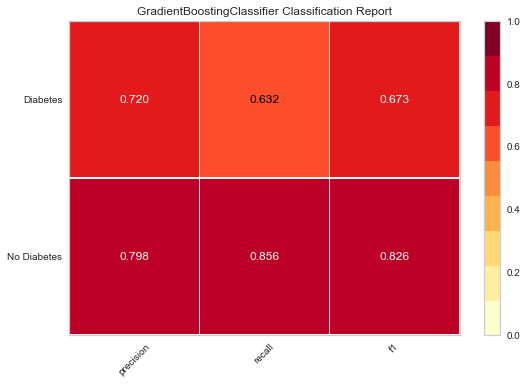

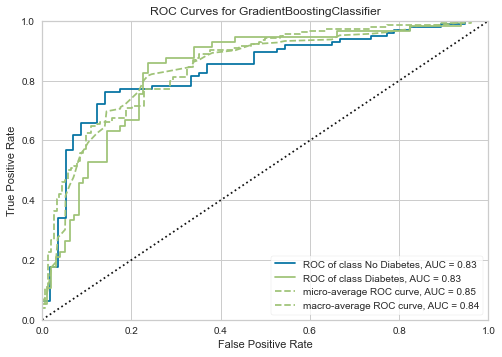

In [110]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test10))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train10))
Performance_report(model =gbm,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [111]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['GBM Classifier',0.80,0.72,0.86,0.63,0.83]
result

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79
2,Random Forest Classifier,0.77,0.70,0.86,0.58,0.83
3,Support Vector Classifier,0.75,0.81,0.94,0.46,0.84
4,Naive Bayes Classifier,0.78,0.71,0.86,0.60,0.83
5,KNeighbors Classifier,0.74,0.68,0.87,0.49,0.76
6,XGBoost Classifier,0.80,0.68,0.81,0.67,0.82
7,Catboost Classifier,0.80,0.71,0.85,0.63,0.84
8,LightGbm Classifier,0.81,0.66,0.79,0.68,0.80
9,GBM Classifier,0.80,0.72,0.86,0.63,0.83


**Observations:**
* Using gbm classifier we got - 
    - Precision as 80% and recall as 86% for Non-diabetic class
    - Precision as 72% and recall as 63% for diabetic class 
* From AUCROC curve, we got AUC of 0.83
* When AUC is 0.83, it means there is a 83% chance that the model will be able to distinguish between positive class and negative class.
* GBM is also a good classifier for this problem, since it has precision and recall in moderate to high range and has AUC of 83%

In [112]:
# we can also define a function that will return classification report and auc score for each model
def model(x_train,y_train,model):
    
    clf = model()
    clf.fit(x_train,y_train)
    ypred = clf.predict(x_test)
    ypred_train = clf.predict(x_train)
    print(classification_report(y_test,ypred))
    print(colored("ROC_AUC_Score for test data :",'red',attrs = ['bold']),round(roc_auc_score(y_test,ypred),2))
    print(colored("ROC_AUC_Score for train data:",'red',attrs = ['bold']),round(roc_auc_score(y_train,ypred_train),2))

In [113]:
#Testing output of a function
model(x_train,y_train,SVC)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        97
           1       0.81      0.46      0.58        57

    accuracy                           0.76       154
   macro avg       0.78      0.70      0.71       154
weighted avg       0.77      0.76      0.74       154

ROC_AUC_Score for test data : 0.7
ROC_AUC_Score for train data: 0.69


**The fuction provides same output as that of individual models' output**

# Cross Validation : 

In [114]:
from sklearn.model_selection import cross_validate

In [115]:
cv_result = cross_validate(lr,x_train,y_train,cv = 10, scoring = 'roc_auc')
    
printmd("**CV score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g**" %(np.mean(cv_result['test_score']),
                                                                      np.std(cv_result['test_score']),
                                                                      np.min(cv_result['test_score']),
                                                                      np.max(cv_result['test_score'])))

<span style='color:None'>**CV score : Mean - 0.8282142 | Std - 0.07419955 | Min - 0.6916667 | Max - 0.9535424**</span>

In [116]:
# We can run a for loop for all the models
models = [lr,clf,rfc,knn,svc,xgb,lgbm,gbm,naive,catb]
model_name = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','K-Nearest Neighbors',
             'Support Vector Classifier','XGboost','Light GBM','GBM', 'Naive Bayes', 'Catboost Classifier']
mean_test_score = []

for i,j in zip(models,model_name):
    printmd("**For "+str(j)+" model :""**",color ='brown')
    cv_result[j] = cross_validate(i,x_train,y_train,cv = 10, scoring = 'roc_auc')
    
    printmd("**CV score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g**" %(round(np.mean(cv_result[j]['test_score']),3),
                                                                      np.std(cv_result[j]['test_score']),
                                                                      np.min(cv_result[j]['test_score']),
                                                                      np.max(cv_result[j]['test_score'])))
    mean_test_score.append(np.mean(cv_result[j]['test_score']))
    
print(mean_test_score)
                                             

<span style='color:brown'>**For Logistic Regression model :**</span>

<span style='color:None'>**CV score : Mean - 0.828 | Std - 0.07419955 | Min - 0.6916667 | Max - 0.9535424**</span>

<span style='color:brown'>**For Decision Tree Classifier model :**</span>

<span style='color:None'>**CV score : Mean - 0.796 | Std - 0.1002423 | Min - 0.6312427 | Max - 0.9674797**</span>

<span style='color:brown'>**For Random Forest Classifier model :**</span>

<span style='color:None'>**CV score : Mean - 0.836 | Std - 0.07858588 | Min - 0.7095238 | Max - 0.9628339**</span>

<span style='color:brown'>**For K-Nearest Neighbors model :**</span>

<span style='color:None'>**CV score : Mean - 0.764 | Std - 0.07988273 | Min - 0.6238095 | Max - 0.8607955**</span>

<span style='color:brown'>**For Support Vector Classifier model :**</span>

<span style='color:None'>**CV score : Mean - 0.818 | Std - 0.08043116 | Min - 0.6559524 | Max - 0.9674797**</span>

<span style='color:brown'>**For XGboost model :**</span>

[20:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<span style='color:None'>**CV score : Mean - 0.813 | Std - 0.07657377 | Min - 0.6714286 | Max - 0.931475**</span>

<span style='color:brown'>**For Light GBM model :**</span>

<span style='color:None'>**CV score : Mean - 0.798 | Std - 0.07103663 | Min - 0.6869048 | Max - 0.9221835**</span>

<span style='color:brown'>**For GBM model :**</span>

<span style='color:None'>**CV score : Mean - 0.834 | Std - 0.08324408 | Min - 0.6583333 | Max - 0.9593496**</span>

<span style='color:brown'>**For Naive Bayes model :**</span>

<span style='color:None'>**CV score : Mean - 0.822 | Std - 0.07029557 | Min - 0.7131243 | Max - 0.9279907**</span>

<span style='color:brown'>**For Catboost Classifier model :**</span>

Learning rate set to 0.007994
0:	learn: 0.6885090	total: 3.77ms	remaining: 3.76s
1:	learn: 0.6847014	total: 5.92ms	remaining: 2.96s
2:	learn: 0.6810396	total: 8.1ms	remaining: 2.69s
3:	learn: 0.6770083	total: 10.4ms	remaining: 2.59s
4:	learn: 0.6723359	total: 12.8ms	remaining: 2.54s
5:	learn: 0.6689936	total: 15.1ms	remaining: 2.49s
6:	learn: 0.6648767	total: 17.4ms	remaining: 2.47s
7:	learn: 0.6612287	total: 19.9ms	remaining: 2.46s
8:	learn: 0.6570841	total: 22.1ms	remaining: 2.43s
9:	learn: 0.6534185	total: 24.1ms	remaining: 2.38s
10:	learn: 0.6494916	total: 26.3ms	remaining: 2.37s
11:	learn: 0.6457923	total: 28.5ms	remaining: 2.35s
12:	learn: 0.6418814	total: 30.9ms	remaining: 2.34s
13:	learn: 0.6384735	total: 33.3ms	remaining: 2.35s
14:	learn: 0.6349340	total: 35.6ms	remaining: 2.34s
15:	learn: 0.6312127	total: 37.9ms	remaining: 2.33s
16:	learn: 0.6271193	total: 40.1ms	remaining: 2.32s
17:	learn: 0.6243073	total: 42.2ms	remaining: 2.3s
18:	learn: 0.6207822	total: 44.6ms	remaining: 

206:	learn: 0.3882348	total: 471ms	remaining: 1.8s
207:	learn: 0.3875969	total: 473ms	remaining: 1.8s
208:	learn: 0.3872363	total: 476ms	remaining: 1.8s
209:	learn: 0.3867344	total: 478ms	remaining: 1.8s
210:	learn: 0.3863432	total: 481ms	remaining: 1.8s
211:	learn: 0.3858890	total: 483ms	remaining: 1.79s
212:	learn: 0.3853743	total: 486ms	remaining: 1.79s
213:	learn: 0.3850715	total: 488ms	remaining: 1.79s
214:	learn: 0.3844558	total: 490ms	remaining: 1.79s
215:	learn: 0.3839218	total: 493ms	remaining: 1.79s
216:	learn: 0.3834439	total: 495ms	remaining: 1.79s
217:	learn: 0.3829146	total: 497ms	remaining: 1.78s
218:	learn: 0.3824388	total: 500ms	remaining: 1.78s
219:	learn: 0.3818145	total: 503ms	remaining: 1.78s
220:	learn: 0.3812384	total: 506ms	remaining: 1.78s
221:	learn: 0.3808575	total: 509ms	remaining: 1.78s
222:	learn: 0.3802800	total: 511ms	remaining: 1.78s
223:	learn: 0.3798292	total: 514ms	remaining: 1.78s
224:	learn: 0.3793628	total: 517ms	remaining: 1.78s
225:	learn: 0.378

411:	learn: 0.3151355	total: 948ms	remaining: 1.35s
412:	learn: 0.3149589	total: 950ms	remaining: 1.35s
413:	learn: 0.3148357	total: 952ms	remaining: 1.35s
414:	learn: 0.3145361	total: 955ms	remaining: 1.34s
415:	learn: 0.3142594	total: 958ms	remaining: 1.34s
416:	learn: 0.3139925	total: 960ms	remaining: 1.34s
417:	learn: 0.3137664	total: 963ms	remaining: 1.34s
418:	learn: 0.3135576	total: 965ms	remaining: 1.34s
419:	learn: 0.3133852	total: 967ms	remaining: 1.33s
420:	learn: 0.3130951	total: 969ms	remaining: 1.33s
421:	learn: 0.3128457	total: 972ms	remaining: 1.33s
422:	learn: 0.3125671	total: 974ms	remaining: 1.33s
423:	learn: 0.3124363	total: 977ms	remaining: 1.33s
424:	learn: 0.3123235	total: 979ms	remaining: 1.32s
425:	learn: 0.3119954	total: 982ms	remaining: 1.32s
426:	learn: 0.3117523	total: 985ms	remaining: 1.32s
427:	learn: 0.3115740	total: 987ms	remaining: 1.32s
428:	learn: 0.3110243	total: 989ms	remaining: 1.32s
429:	learn: 0.3108779	total: 991ms	remaining: 1.31s
430:	learn: 

626:	learn: 0.2662603	total: 1.42s	remaining: 847ms
627:	learn: 0.2660791	total: 1.43s	remaining: 845ms
628:	learn: 0.2659413	total: 1.43s	remaining: 843ms
629:	learn: 0.2656552	total: 1.43s	remaining: 840ms
630:	learn: 0.2654228	total: 1.43s	remaining: 838ms
631:	learn: 0.2651270	total: 1.44s	remaining: 836ms
632:	learn: 0.2648154	total: 1.44s	remaining: 834ms
633:	learn: 0.2643111	total: 1.44s	remaining: 832ms
634:	learn: 0.2638656	total: 1.44s	remaining: 829ms
635:	learn: 0.2636463	total: 1.45s	remaining: 827ms
636:	learn: 0.2635166	total: 1.45s	remaining: 825ms
637:	learn: 0.2633850	total: 1.45s	remaining: 824ms
638:	learn: 0.2631822	total: 1.45s	remaining: 821ms
639:	learn: 0.2629615	total: 1.46s	remaining: 819ms
640:	learn: 0.2626759	total: 1.46s	remaining: 818ms
641:	learn: 0.2625090	total: 1.46s	remaining: 816ms
642:	learn: 0.2622612	total: 1.47s	remaining: 814ms
643:	learn: 0.2620410	total: 1.47s	remaining: 811ms
644:	learn: 0.2618178	total: 1.47s	remaining: 809ms
645:	learn: 

825:	learn: 0.2286415	total: 1.87s	remaining: 394ms
826:	learn: 0.2285146	total: 1.87s	remaining: 392ms
827:	learn: 0.2283745	total: 1.88s	remaining: 390ms
828:	learn: 0.2281488	total: 1.88s	remaining: 388ms
829:	learn: 0.2279899	total: 1.88s	remaining: 386ms
830:	learn: 0.2278501	total: 1.89s	remaining: 383ms
831:	learn: 0.2277840	total: 1.89s	remaining: 381ms
832:	learn: 0.2275690	total: 1.89s	remaining: 379ms
833:	learn: 0.2273402	total: 1.89s	remaining: 377ms
834:	learn: 0.2272080	total: 1.9s	remaining: 374ms
835:	learn: 0.2271621	total: 1.9s	remaining: 372ms
836:	learn: 0.2270357	total: 1.9s	remaining: 370ms
837:	learn: 0.2269107	total: 1.9s	remaining: 368ms
838:	learn: 0.2267227	total: 1.91s	remaining: 366ms
839:	learn: 0.2264855	total: 1.91s	remaining: 363ms
840:	learn: 0.2263576	total: 1.91s	remaining: 361ms
841:	learn: 0.2261854	total: 1.91s	remaining: 359ms
842:	learn: 0.2260010	total: 1.92s	remaining: 357ms
843:	learn: 0.2255737	total: 1.92s	remaining: 355ms
844:	learn: 0.22

Learning rate set to 0.007994
0:	learn: 0.6879369	total: 5.62ms	remaining: 5.61s
1:	learn: 0.6840709	total: 11.7ms	remaining: 5.84s
2:	learn: 0.6799633	total: 18.5ms	remaining: 6.14s
3:	learn: 0.6753875	total: 25.6ms	remaining: 6.39s
4:	learn: 0.6703301	total: 30.6ms	remaining: 6.09s
5:	learn: 0.6664749	total: 34.3ms	remaining: 5.69s
6:	learn: 0.6627669	total: 37.8ms	remaining: 5.36s
7:	learn: 0.6587994	total: 41ms	remaining: 5.08s
8:	learn: 0.6541418	total: 44.5ms	remaining: 4.9s
9:	learn: 0.6510011	total: 48ms	remaining: 4.75s
10:	learn: 0.6468173	total: 51.6ms	remaining: 4.64s
11:	learn: 0.6427686	total: 55.1ms	remaining: 4.54s
12:	learn: 0.6392384	total: 58ms	remaining: 4.41s
13:	learn: 0.6353058	total: 60.7ms	remaining: 4.28s
14:	learn: 0.6318669	total: 63.5ms	remaining: 4.17s
15:	learn: 0.6285892	total: 65.8ms	remaining: 4.05s
16:	learn: 0.6248325	total: 68ms	remaining: 3.93s
17:	learn: 0.6220701	total: 70.3ms	remaining: 3.84s
18:	learn: 0.6179437	total: 72.7ms	remaining: 3.75s
1

201:	learn: 0.3817262	total: 478ms	remaining: 1.89s
202:	learn: 0.3812993	total: 481ms	remaining: 1.89s
203:	learn: 0.3809536	total: 483ms	remaining: 1.88s
204:	learn: 0.3806063	total: 486ms	remaining: 1.88s
205:	learn: 0.3801589	total: 488ms	remaining: 1.88s
206:	learn: 0.3795213	total: 491ms	remaining: 1.88s
207:	learn: 0.3792635	total: 494ms	remaining: 1.88s
208:	learn: 0.3787731	total: 497ms	remaining: 1.88s
209:	learn: 0.3782408	total: 500ms	remaining: 1.88s
210:	learn: 0.3778931	total: 502ms	remaining: 1.88s
211:	learn: 0.3775470	total: 505ms	remaining: 1.88s
212:	learn: 0.3772874	total: 507ms	remaining: 1.87s
213:	learn: 0.3767793	total: 510ms	remaining: 1.87s
214:	learn: 0.3761805	total: 511ms	remaining: 1.87s
215:	learn: 0.3758468	total: 513ms	remaining: 1.86s
216:	learn: 0.3751632	total: 516ms	remaining: 1.86s
217:	learn: 0.3746644	total: 518ms	remaining: 1.86s
218:	learn: 0.3741758	total: 520ms	remaining: 1.85s
219:	learn: 0.3736969	total: 522ms	remaining: 1.85s
220:	learn: 

403:	learn: 0.3096324	total: 945ms	remaining: 1.39s
404:	learn: 0.3095438	total: 947ms	remaining: 1.39s
405:	learn: 0.3090434	total: 949ms	remaining: 1.39s
406:	learn: 0.3087724	total: 952ms	remaining: 1.39s
407:	learn: 0.3084268	total: 954ms	remaining: 1.38s
408:	learn: 0.3082635	total: 957ms	remaining: 1.38s
409:	learn: 0.3080039	total: 959ms	remaining: 1.38s
410:	learn: 0.3075755	total: 961ms	remaining: 1.38s
411:	learn: 0.3074313	total: 964ms	remaining: 1.38s
412:	learn: 0.3072834	total: 966ms	remaining: 1.37s
413:	learn: 0.3071258	total: 968ms	remaining: 1.37s
414:	learn: 0.3069753	total: 971ms	remaining: 1.37s
415:	learn: 0.3067620	total: 974ms	remaining: 1.37s
416:	learn: 0.3064745	total: 976ms	remaining: 1.36s
417:	learn: 0.3063082	total: 979ms	remaining: 1.36s
418:	learn: 0.3059914	total: 982ms	remaining: 1.36s
419:	learn: 0.3056728	total: 985ms	remaining: 1.36s
420:	learn: 0.3053863	total: 987ms	remaining: 1.36s
421:	learn: 0.3052040	total: 990ms	remaining: 1.36s
422:	learn: 

619:	learn: 0.2608255	total: 1.42s	remaining: 871ms
620:	learn: 0.2604645	total: 1.42s	remaining: 869ms
621:	learn: 0.2601639	total: 1.43s	remaining: 867ms
622:	learn: 0.2600120	total: 1.43s	remaining: 864ms
623:	learn: 0.2598647	total: 1.43s	remaining: 862ms
624:	learn: 0.2595055	total: 1.43s	remaining: 860ms
625:	learn: 0.2591952	total: 1.44s	remaining: 858ms
626:	learn: 0.2589556	total: 1.44s	remaining: 856ms
627:	learn: 0.2588006	total: 1.44s	remaining: 853ms
628:	learn: 0.2585475	total: 1.44s	remaining: 851ms
629:	learn: 0.2583642	total: 1.45s	remaining: 849ms
630:	learn: 0.2581506	total: 1.45s	remaining: 847ms
631:	learn: 0.2577797	total: 1.45s	remaining: 844ms
632:	learn: 0.2576529	total: 1.45s	remaining: 842ms
633:	learn: 0.2571724	total: 1.46s	remaining: 840ms
634:	learn: 0.2570358	total: 1.46s	remaining: 838ms
635:	learn: 0.2568281	total: 1.46s	remaining: 836ms
636:	learn: 0.2566759	total: 1.46s	remaining: 834ms
637:	learn: 0.2565631	total: 1.47s	remaining: 832ms
638:	learn: 

810:	learn: 0.2242306	total: 1.87s	remaining: 437ms
811:	learn: 0.2238821	total: 1.88s	remaining: 434ms
812:	learn: 0.2237554	total: 1.88s	remaining: 432ms
813:	learn: 0.2235242	total: 1.88s	remaining: 430ms
814:	learn: 0.2233317	total: 1.88s	remaining: 428ms
815:	learn: 0.2232272	total: 1.89s	remaining: 425ms
816:	learn: 0.2231668	total: 1.89s	remaining: 423ms
817:	learn: 0.2229673	total: 1.89s	remaining: 421ms
818:	learn: 0.2228713	total: 1.89s	remaining: 418ms
819:	learn: 0.2227048	total: 1.89s	remaining: 416ms
820:	learn: 0.2226132	total: 1.9s	remaining: 414ms
821:	learn: 0.2224675	total: 1.9s	remaining: 411ms
822:	learn: 0.2223386	total: 1.9s	remaining: 409ms
823:	learn: 0.2221884	total: 1.9s	remaining: 407ms
824:	learn: 0.2220696	total: 1.91s	remaining: 405ms
825:	learn: 0.2218162	total: 1.91s	remaining: 403ms
826:	learn: 0.2215393	total: 1.91s	remaining: 400ms
827:	learn: 0.2213652	total: 1.92s	remaining: 398ms
828:	learn: 0.2212061	total: 1.92s	remaining: 395ms
829:	learn: 0.22

Learning rate set to 0.007994
0:	learn: 0.6887986	total: 2.93ms	remaining: 2.93s
1:	learn: 0.6852224	total: 5.45ms	remaining: 2.72s
2:	learn: 0.6816875	total: 7.97ms	remaining: 2.65s
3:	learn: 0.6775563	total: 10.5ms	remaining: 2.62s
4:	learn: 0.6736512	total: 13.2ms	remaining: 2.63s
5:	learn: 0.6706506	total: 15.9ms	remaining: 2.64s
6:	learn: 0.6675849	total: 18.5ms	remaining: 2.63s
7:	learn: 0.6644238	total: 21.2ms	remaining: 2.63s
8:	learn: 0.6609868	total: 24.1ms	remaining: 2.65s
9:	learn: 0.6583659	total: 26.8ms	remaining: 2.65s
10:	learn: 0.6541752	total: 29.4ms	remaining: 2.64s
11:	learn: 0.6510753	total: 32ms	remaining: 2.64s
12:	learn: 0.6486936	total: 34.5ms	remaining: 2.62s
13:	learn: 0.6453797	total: 36.7ms	remaining: 2.59s
14:	learn: 0.6421594	total: 39.2ms	remaining: 2.57s
15:	learn: 0.6388725	total: 41.4ms	remaining: 2.55s
16:	learn: 0.6350408	total: 43.9ms	remaining: 2.54s
17:	learn: 0.6324275	total: 46.4ms	remaining: 2.53s
18:	learn: 0.6291586	total: 48.9ms	remaining: 

212:	learn: 0.4041948	total: 477ms	remaining: 1.76s
213:	learn: 0.4037654	total: 480ms	remaining: 1.76s
214:	learn: 0.4032424	total: 482ms	remaining: 1.76s
215:	learn: 0.4026253	total: 484ms	remaining: 1.76s
216:	learn: 0.4020391	total: 487ms	remaining: 1.76s
217:	learn: 0.4014987	total: 489ms	remaining: 1.75s
218:	learn: 0.4010620	total: 492ms	remaining: 1.75s
219:	learn: 0.4002587	total: 495ms	remaining: 1.75s
220:	learn: 0.3995497	total: 497ms	remaining: 1.75s
221:	learn: 0.3990229	total: 500ms	remaining: 1.75s
222:	learn: 0.3985732	total: 502ms	remaining: 1.75s
223:	learn: 0.3981650	total: 504ms	remaining: 1.75s
224:	learn: 0.3977437	total: 507ms	remaining: 1.74s
225:	learn: 0.3972045	total: 509ms	remaining: 1.74s
226:	learn: 0.3966124	total: 513ms	remaining: 1.75s
227:	learn: 0.3962911	total: 516ms	remaining: 1.75s
228:	learn: 0.3960141	total: 518ms	remaining: 1.74s
229:	learn: 0.3956017	total: 520ms	remaining: 1.74s
230:	learn: 0.3952324	total: 522ms	remaining: 1.74s
231:	learn: 

420:	learn: 0.3319487	total: 952ms	remaining: 1.31s
421:	learn: 0.3317255	total: 955ms	remaining: 1.31s
422:	learn: 0.3313311	total: 958ms	remaining: 1.31s
423:	learn: 0.3309743	total: 960ms	remaining: 1.3s
424:	learn: 0.3307559	total: 962ms	remaining: 1.3s
425:	learn: 0.3304672	total: 965ms	remaining: 1.3s
426:	learn: 0.3302328	total: 967ms	remaining: 1.3s
427:	learn: 0.3300163	total: 970ms	remaining: 1.29s
428:	learn: 0.3298161	total: 972ms	remaining: 1.29s
429:	learn: 0.3295820	total: 974ms	remaining: 1.29s
430:	learn: 0.3291066	total: 976ms	remaining: 1.29s
431:	learn: 0.3286587	total: 979ms	remaining: 1.29s
432:	learn: 0.3284951	total: 981ms	remaining: 1.28s
433:	learn: 0.3280012	total: 984ms	remaining: 1.28s
434:	learn: 0.3278338	total: 987ms	remaining: 1.28s
435:	learn: 0.3277257	total: 989ms	remaining: 1.28s
436:	learn: 0.3275037	total: 993ms	remaining: 1.28s
437:	learn: 0.3272283	total: 996ms	remaining: 1.28s
438:	learn: 0.3268966	total: 998ms	remaining: 1.27s
439:	learn: 0.32

637:	learn: 0.2810757	total: 1.43s	remaining: 812ms
638:	learn: 0.2809564	total: 1.43s	remaining: 810ms
639:	learn: 0.2807637	total: 1.44s	remaining: 808ms
640:	learn: 0.2805557	total: 1.44s	remaining: 806ms
641:	learn: 0.2803397	total: 1.44s	remaining: 804ms
642:	learn: 0.2802072	total: 1.44s	remaining: 802ms
643:	learn: 0.2799903	total: 1.45s	remaining: 799ms
644:	learn: 0.2798206	total: 1.45s	remaining: 797ms
645:	learn: 0.2796099	total: 1.45s	remaining: 795ms
646:	learn: 0.2793857	total: 1.45s	remaining: 793ms
647:	learn: 0.2792085	total: 1.46s	remaining: 791ms
648:	learn: 0.2790599	total: 1.46s	remaining: 788ms
649:	learn: 0.2788543	total: 1.46s	remaining: 786ms
650:	learn: 0.2787457	total: 1.46s	remaining: 784ms
651:	learn: 0.2784982	total: 1.47s	remaining: 782ms
652:	learn: 0.2783605	total: 1.47s	remaining: 780ms
653:	learn: 0.2781328	total: 1.47s	remaining: 778ms
654:	learn: 0.2780092	total: 1.47s	remaining: 776ms
655:	learn: 0.2779221	total: 1.48s	remaining: 774ms
656:	learn: 

849:	learn: 0.2404896	total: 1.9s	remaining: 335ms
850:	learn: 0.2403815	total: 1.9s	remaining: 333ms
851:	learn: 0.2402087	total: 1.9s	remaining: 331ms
852:	learn: 0.2400680	total: 1.91s	remaining: 328ms
853:	learn: 0.2398317	total: 1.91s	remaining: 326ms
854:	learn: 0.2395211	total: 1.91s	remaining: 324ms
855:	learn: 0.2394073	total: 1.91s	remaining: 322ms
856:	learn: 0.2392168	total: 1.92s	remaining: 320ms
857:	learn: 0.2390381	total: 1.92s	remaining: 317ms
858:	learn: 0.2388111	total: 1.92s	remaining: 315ms
859:	learn: 0.2385203	total: 1.92s	remaining: 313ms
860:	learn: 0.2384598	total: 1.92s	remaining: 311ms
861:	learn: 0.2382084	total: 1.93s	remaining: 309ms
862:	learn: 0.2381524	total: 1.93s	remaining: 306ms
863:	learn: 0.2379675	total: 1.93s	remaining: 304ms
864:	learn: 0.2378353	total: 1.94s	remaining: 302ms
865:	learn: 0.2376154	total: 1.94s	remaining: 300ms
866:	learn: 0.2372637	total: 1.94s	remaining: 298ms
867:	learn: 0.2370013	total: 1.94s	remaining: 295ms
868:	learn: 0.2

69:	learn: 0.5114667	total: 153ms	remaining: 2.04s
70:	learn: 0.5098320	total: 156ms	remaining: 2.04s
71:	learn: 0.5082306	total: 158ms	remaining: 2.04s
72:	learn: 0.5068597	total: 161ms	remaining: 2.04s
73:	learn: 0.5052220	total: 163ms	remaining: 2.04s
74:	learn: 0.5039077	total: 166ms	remaining: 2.04s
75:	learn: 0.5024576	total: 168ms	remaining: 2.04s
76:	learn: 0.5008685	total: 171ms	remaining: 2.04s
77:	learn: 0.4994576	total: 173ms	remaining: 2.04s
78:	learn: 0.4982307	total: 175ms	remaining: 2.04s
79:	learn: 0.4969326	total: 177ms	remaining: 2.04s
80:	learn: 0.4951568	total: 180ms	remaining: 2.04s
81:	learn: 0.4934855	total: 182ms	remaining: 2.04s
82:	learn: 0.4923384	total: 184ms	remaining: 2.04s
83:	learn: 0.4907280	total: 188ms	remaining: 2.05s
84:	learn: 0.4895078	total: 190ms	remaining: 2.05s
85:	learn: 0.4883028	total: 194ms	remaining: 2.06s
86:	learn: 0.4870841	total: 196ms	remaining: 2.05s
87:	learn: 0.4856082	total: 198ms	remaining: 2.05s
88:	learn: 0.4840690	total: 200

282:	learn: 0.3568022	total: 629ms	remaining: 1.59s
283:	learn: 0.3564343	total: 631ms	remaining: 1.59s
284:	learn: 0.3559939	total: 633ms	remaining: 1.59s
285:	learn: 0.3557827	total: 636ms	remaining: 1.59s
286:	learn: 0.3553663	total: 638ms	remaining: 1.59s
287:	learn: 0.3550059	total: 642ms	remaining: 1.58s
288:	learn: 0.3546154	total: 644ms	remaining: 1.58s
289:	learn: 0.3542950	total: 646ms	remaining: 1.58s
290:	learn: 0.3539791	total: 649ms	remaining: 1.58s
291:	learn: 0.3535829	total: 651ms	remaining: 1.58s
292:	learn: 0.3532108	total: 653ms	remaining: 1.58s
293:	learn: 0.3527290	total: 656ms	remaining: 1.57s
294:	learn: 0.3525234	total: 658ms	remaining: 1.57s
295:	learn: 0.3521869	total: 660ms	remaining: 1.57s
296:	learn: 0.3519188	total: 663ms	remaining: 1.57s
297:	learn: 0.3515526	total: 666ms	remaining: 1.57s
298:	learn: 0.3511842	total: 671ms	remaining: 1.57s
299:	learn: 0.3507765	total: 674ms	remaining: 1.57s
300:	learn: 0.3503901	total: 676ms	remaining: 1.57s
301:	learn: 

493:	learn: 0.2960399	total: 1.1s	remaining: 1.13s
494:	learn: 0.2958301	total: 1.11s	remaining: 1.13s
495:	learn: 0.2956356	total: 1.11s	remaining: 1.13s
496:	learn: 0.2955667	total: 1.11s	remaining: 1.12s
497:	learn: 0.2953372	total: 1.11s	remaining: 1.12s
498:	learn: 0.2950415	total: 1.12s	remaining: 1.12s
499:	learn: 0.2948875	total: 1.12s	remaining: 1.12s
500:	learn: 0.2947220	total: 1.12s	remaining: 1.12s
501:	learn: 0.2945540	total: 1.12s	remaining: 1.11s
502:	learn: 0.2944373	total: 1.13s	remaining: 1.11s
503:	learn: 0.2941209	total: 1.13s	remaining: 1.11s
504:	learn: 0.2938331	total: 1.13s	remaining: 1.11s
505:	learn: 0.2936005	total: 1.13s	remaining: 1.1s
506:	learn: 0.2934356	total: 1.14s	remaining: 1.1s
507:	learn: 0.2933696	total: 1.14s	remaining: 1.1s
508:	learn: 0.2931889	total: 1.14s	remaining: 1.1s
509:	learn: 0.2929966	total: 1.14s	remaining: 1.1s
510:	learn: 0.2927357	total: 1.14s	remaining: 1.09s
511:	learn: 0.2924886	total: 1.15s	remaining: 1.09s
512:	learn: 0.2920

710:	learn: 0.2498616	total: 1.58s	remaining: 642ms
711:	learn: 0.2496374	total: 1.58s	remaining: 640ms
712:	learn: 0.2494807	total: 1.58s	remaining: 638ms
713:	learn: 0.2493669	total: 1.59s	remaining: 636ms
714:	learn: 0.2492678	total: 1.59s	remaining: 634ms
715:	learn: 0.2490272	total: 1.59s	remaining: 632ms
716:	learn: 0.2487790	total: 1.59s	remaining: 629ms
717:	learn: 0.2486966	total: 1.6s	remaining: 627ms
718:	learn: 0.2484983	total: 1.6s	remaining: 625ms
719:	learn: 0.2482910	total: 1.6s	remaining: 623ms
720:	learn: 0.2481349	total: 1.6s	remaining: 621ms
721:	learn: 0.2479987	total: 1.61s	remaining: 619ms
722:	learn: 0.2477288	total: 1.61s	remaining: 616ms
723:	learn: 0.2476124	total: 1.61s	remaining: 614ms
724:	learn: 0.2474959	total: 1.61s	remaining: 612ms
725:	learn: 0.2473558	total: 1.62s	remaining: 610ms
726:	learn: 0.2471846	total: 1.62s	remaining: 608ms
727:	learn: 0.2470231	total: 1.62s	remaining: 606ms
728:	learn: 0.2469162	total: 1.62s	remaining: 604ms
729:	learn: 0.24

923:	learn: 0.2112665	total: 2.06s	remaining: 169ms
924:	learn: 0.2110070	total: 2.06s	remaining: 167ms
925:	learn: 0.2108976	total: 2.06s	remaining: 165ms
926:	learn: 0.2106004	total: 2.07s	remaining: 163ms
927:	learn: 0.2103396	total: 2.07s	remaining: 161ms
928:	learn: 0.2102537	total: 2.07s	remaining: 158ms
929:	learn: 0.2099001	total: 2.07s	remaining: 156ms
930:	learn: 0.2097592	total: 2.08s	remaining: 154ms
931:	learn: 0.2093959	total: 2.08s	remaining: 152ms
932:	learn: 0.2091987	total: 2.08s	remaining: 149ms
933:	learn: 0.2090952	total: 2.08s	remaining: 147ms
934:	learn: 0.2089855	total: 2.08s	remaining: 145ms
935:	learn: 0.2089103	total: 2.09s	remaining: 143ms
936:	learn: 0.2086837	total: 2.09s	remaining: 141ms
937:	learn: 0.2085159	total: 2.09s	remaining: 138ms
938:	learn: 0.2083599	total: 2.1s	remaining: 136ms
939:	learn: 0.2082233	total: 2.1s	remaining: 134ms
940:	learn: 0.2080629	total: 2.1s	remaining: 132ms
941:	learn: 0.2078251	total: 2.1s	remaining: 129ms
942:	learn: 0.20

132:	learn: 0.4274505	total: 316ms	remaining: 2.06s
133:	learn: 0.4268794	total: 318ms	remaining: 2.06s
134:	learn: 0.4257953	total: 321ms	remaining: 2.06s
135:	learn: 0.4249022	total: 323ms	remaining: 2.05s
136:	learn: 0.4240437	total: 325ms	remaining: 2.05s
137:	learn: 0.4235604	total: 328ms	remaining: 2.05s
138:	learn: 0.4229255	total: 331ms	remaining: 2.05s
139:	learn: 0.4220858	total: 333ms	remaining: 2.05s
140:	learn: 0.4213951	total: 335ms	remaining: 2.04s
141:	learn: 0.4206436	total: 338ms	remaining: 2.04s
142:	learn: 0.4200269	total: 340ms	remaining: 2.04s
143:	learn: 0.4193476	total: 342ms	remaining: 2.04s
144:	learn: 0.4187613	total: 345ms	remaining: 2.03s
145:	learn: 0.4181695	total: 347ms	remaining: 2.03s
146:	learn: 0.4173086	total: 350ms	remaining: 2.03s
147:	learn: 0.4165132	total: 353ms	remaining: 2.03s
148:	learn: 0.4158500	total: 356ms	remaining: 2.03s
149:	learn: 0.4149928	total: 359ms	remaining: 2.03s
150:	learn: 0.4144494	total: 361ms	remaining: 2.03s
151:	learn: 

339:	learn: 0.3278425	total: 795ms	remaining: 1.54s
340:	learn: 0.3274673	total: 798ms	remaining: 1.54s
341:	learn: 0.3273291	total: 800ms	remaining: 1.54s
342:	learn: 0.3269118	total: 802ms	remaining: 1.54s
343:	learn: 0.3266567	total: 805ms	remaining: 1.53s
344:	learn: 0.3262299	total: 808ms	remaining: 1.53s
345:	learn: 0.3258064	total: 810ms	remaining: 1.53s
346:	learn: 0.3255109	total: 812ms	remaining: 1.53s
347:	learn: 0.3251606	total: 815ms	remaining: 1.53s
348:	learn: 0.3248602	total: 817ms	remaining: 1.52s
349:	learn: 0.3244886	total: 819ms	remaining: 1.52s
350:	learn: 0.3241589	total: 822ms	remaining: 1.52s
351:	learn: 0.3239504	total: 824ms	remaining: 1.52s
352:	learn: 0.3235888	total: 827ms	remaining: 1.51s
353:	learn: 0.3233690	total: 829ms	remaining: 1.51s
354:	learn: 0.3228854	total: 832ms	remaining: 1.51s
355:	learn: 0.3226006	total: 835ms	remaining: 1.51s
356:	learn: 0.3222819	total: 838ms	remaining: 1.51s
357:	learn: 0.3220609	total: 840ms	remaining: 1.5s
358:	learn: 0

554:	learn: 0.2723955	total: 1.27s	remaining: 1.01s
555:	learn: 0.2722510	total: 1.27s	remaining: 1.01s
556:	learn: 0.2720120	total: 1.27s	remaining: 1.01s
557:	learn: 0.2717776	total: 1.27s	remaining: 1.01s
558:	learn: 0.2715832	total: 1.28s	remaining: 1.01s
559:	learn: 0.2714383	total: 1.28s	remaining: 1s
560:	learn: 0.2711651	total: 1.28s	remaining: 1s
561:	learn: 0.2710004	total: 1.28s	remaining: 1s
562:	learn: 0.2708075	total: 1.29s	remaining: 999ms
563:	learn: 0.2705070	total: 1.29s	remaining: 996ms
564:	learn: 0.2702709	total: 1.29s	remaining: 994ms
565:	learn: 0.2699774	total: 1.29s	remaining: 992ms
566:	learn: 0.2696428	total: 1.3s	remaining: 990ms
567:	learn: 0.2694206	total: 1.3s	remaining: 988ms
568:	learn: 0.2691648	total: 1.3s	remaining: 986ms
569:	learn: 0.2690313	total: 1.3s	remaining: 984ms
570:	learn: 0.2689562	total: 1.31s	remaining: 983ms
571:	learn: 0.2687448	total: 1.31s	remaining: 981ms
572:	learn: 0.2686372	total: 1.31s	remaining: 978ms
573:	learn: 0.2685516	tot

771:	learn: 0.2297506	total: 1.75s	remaining: 515ms
772:	learn: 0.2295183	total: 1.75s	remaining: 513ms
773:	learn: 0.2293623	total: 1.75s	remaining: 511ms
774:	learn: 0.2291883	total: 1.75s	remaining: 509ms
775:	learn: 0.2291256	total: 1.75s	remaining: 506ms
776:	learn: 0.2289655	total: 1.76s	remaining: 504ms
777:	learn: 0.2288414	total: 1.76s	remaining: 502ms
778:	learn: 0.2287565	total: 1.76s	remaining: 500ms
779:	learn: 0.2286648	total: 1.76s	remaining: 497ms
780:	learn: 0.2285470	total: 1.77s	remaining: 495ms
781:	learn: 0.2284239	total: 1.77s	remaining: 493ms
782:	learn: 0.2283479	total: 1.77s	remaining: 491ms
783:	learn: 0.2281978	total: 1.77s	remaining: 488ms
784:	learn: 0.2280277	total: 1.77s	remaining: 486ms
785:	learn: 0.2279371	total: 1.78s	remaining: 484ms
786:	learn: 0.2276985	total: 1.78s	remaining: 482ms
787:	learn: 0.2275265	total: 1.78s	remaining: 480ms
788:	learn: 0.2273677	total: 1.78s	remaining: 477ms
789:	learn: 0.2271719	total: 1.79s	remaining: 475ms
790:	learn: 

953:	learn: 0.1982284	total: 2.23s	remaining: 107ms
954:	learn: 0.1979491	total: 2.23s	remaining: 105ms
955:	learn: 0.1978273	total: 2.23s	remaining: 103ms
956:	learn: 0.1976034	total: 2.23s	remaining: 100ms
957:	learn: 0.1975866	total: 2.24s	remaining: 98.1ms
958:	learn: 0.1973679	total: 2.24s	remaining: 95.8ms
959:	learn: 0.1972486	total: 2.24s	remaining: 93.5ms
960:	learn: 0.1971365	total: 2.25s	remaining: 91.2ms
961:	learn: 0.1970660	total: 2.25s	remaining: 88.9ms
962:	learn: 0.1968008	total: 2.25s	remaining: 86.6ms
963:	learn: 0.1966617	total: 2.26s	remaining: 84.3ms
964:	learn: 0.1964498	total: 2.26s	remaining: 81.9ms
965:	learn: 0.1963183	total: 2.26s	remaining: 79.6ms
966:	learn: 0.1962607	total: 2.27s	remaining: 77.4ms
967:	learn: 0.1961605	total: 2.27s	remaining: 75ms
968:	learn: 0.1961223	total: 2.27s	remaining: 72.7ms
969:	learn: 0.1959879	total: 2.27s	remaining: 70.4ms
970:	learn: 0.1958873	total: 2.28s	remaining: 68ms
971:	learn: 0.1958405	total: 2.28s	remaining: 65.7ms
9

123:	learn: 0.4470091	total: 318ms	remaining: 2.25s
124:	learn: 0.4460869	total: 321ms	remaining: 2.24s
125:	learn: 0.4449712	total: 323ms	remaining: 2.24s
126:	learn: 0.4440274	total: 325ms	remaining: 2.23s
127:	learn: 0.4429676	total: 328ms	remaining: 2.23s
128:	learn: 0.4419964	total: 331ms	remaining: 2.23s
129:	learn: 0.4412579	total: 333ms	remaining: 2.23s
130:	learn: 0.4399884	total: 335ms	remaining: 2.22s
131:	learn: 0.4389459	total: 338ms	remaining: 2.22s
132:	learn: 0.4381144	total: 340ms	remaining: 2.22s
133:	learn: 0.4374683	total: 342ms	remaining: 2.21s
134:	learn: 0.4364947	total: 346ms	remaining: 2.21s
135:	learn: 0.4359889	total: 348ms	remaining: 2.21s
136:	learn: 0.4349581	total: 352ms	remaining: 2.22s
137:	learn: 0.4340560	total: 355ms	remaining: 2.22s
138:	learn: 0.4330880	total: 359ms	remaining: 2.22s
139:	learn: 0.4322136	total: 362ms	remaining: 2.22s
140:	learn: 0.4317033	total: 364ms	remaining: 2.22s
141:	learn: 0.4312039	total: 366ms	remaining: 2.21s
142:	learn: 

309:	learn: 0.3473802	total: 795ms	remaining: 1.77s
310:	learn: 0.3471381	total: 798ms	remaining: 1.77s
311:	learn: 0.3466841	total: 801ms	remaining: 1.77s
312:	learn: 0.3463996	total: 804ms	remaining: 1.76s
313:	learn: 0.3461145	total: 807ms	remaining: 1.76s
314:	learn: 0.3458014	total: 810ms	remaining: 1.76s
315:	learn: 0.3452557	total: 813ms	remaining: 1.76s
316:	learn: 0.3450267	total: 815ms	remaining: 1.76s
317:	learn: 0.3448765	total: 818ms	remaining: 1.75s
318:	learn: 0.3445552	total: 821ms	remaining: 1.75s
319:	learn: 0.3441731	total: 824ms	remaining: 1.75s
320:	learn: 0.3437036	total: 827ms	remaining: 1.75s
321:	learn: 0.3432354	total: 829ms	remaining: 1.75s
322:	learn: 0.3428932	total: 833ms	remaining: 1.75s
323:	learn: 0.3426229	total: 836ms	remaining: 1.75s
324:	learn: 0.3422881	total: 839ms	remaining: 1.74s
325:	learn: 0.3419466	total: 842ms	remaining: 1.74s
326:	learn: 0.3415067	total: 845ms	remaining: 1.74s
327:	learn: 0.3412975	total: 847ms	remaining: 1.74s
328:	learn: 

495:	learn: 0.2960770	total: 1.27s	remaining: 1.29s
496:	learn: 0.2957316	total: 1.27s	remaining: 1.28s
497:	learn: 0.2953119	total: 1.27s	remaining: 1.28s
498:	learn: 0.2951108	total: 1.27s	remaining: 1.28s
499:	learn: 0.2950024	total: 1.28s	remaining: 1.28s
500:	learn: 0.2946671	total: 1.28s	remaining: 1.27s
501:	learn: 0.2944245	total: 1.28s	remaining: 1.27s
502:	learn: 0.2940847	total: 1.28s	remaining: 1.27s
503:	learn: 0.2938730	total: 1.29s	remaining: 1.27s
504:	learn: 0.2937573	total: 1.29s	remaining: 1.26s
505:	learn: 0.2935810	total: 1.29s	remaining: 1.26s
506:	learn: 0.2933559	total: 1.29s	remaining: 1.26s
507:	learn: 0.2930754	total: 1.3s	remaining: 1.25s
508:	learn: 0.2928575	total: 1.3s	remaining: 1.25s
509:	learn: 0.2926208	total: 1.3s	remaining: 1.25s
510:	learn: 0.2923870	total: 1.3s	remaining: 1.25s
511:	learn: 0.2922802	total: 1.31s	remaining: 1.25s
512:	learn: 0.2919295	total: 1.31s	remaining: 1.24s
513:	learn: 0.2917483	total: 1.31s	remaining: 1.24s
514:	learn: 0.29

707:	learn: 0.2517295	total: 1.75s	remaining: 720ms
708:	learn: 0.2515466	total: 1.75s	remaining: 718ms
709:	learn: 0.2512289	total: 1.75s	remaining: 715ms
710:	learn: 0.2509771	total: 1.75s	remaining: 713ms
711:	learn: 0.2506929	total: 1.76s	remaining: 711ms
712:	learn: 0.2503923	total: 1.76s	remaining: 708ms
713:	learn: 0.2502812	total: 1.76s	remaining: 706ms
714:	learn: 0.2499705	total: 1.76s	remaining: 703ms
715:	learn: 0.2497878	total: 1.77s	remaining: 701ms
716:	learn: 0.2495053	total: 1.77s	remaining: 698ms
717:	learn: 0.2492745	total: 1.77s	remaining: 696ms
718:	learn: 0.2490889	total: 1.77s	remaining: 693ms
719:	learn: 0.2486798	total: 1.78s	remaining: 691ms
720:	learn: 0.2485739	total: 1.78s	remaining: 688ms
721:	learn: 0.2483997	total: 1.78s	remaining: 686ms
722:	learn: 0.2483056	total: 1.78s	remaining: 684ms
723:	learn: 0.2481364	total: 1.79s	remaining: 681ms
724:	learn: 0.2478918	total: 1.79s	remaining: 679ms
725:	learn: 0.2476903	total: 1.79s	remaining: 676ms
726:	learn: 

915:	learn: 0.2141630	total: 2.22s	remaining: 203ms
916:	learn: 0.2138506	total: 2.22s	remaining: 201ms
917:	learn: 0.2135626	total: 2.22s	remaining: 198ms
918:	learn: 0.2134723	total: 2.22s	remaining: 196ms
919:	learn: 0.2133391	total: 2.23s	remaining: 194ms
920:	learn: 0.2132372	total: 2.23s	remaining: 191ms
921:	learn: 0.2130550	total: 2.23s	remaining: 189ms
922:	learn: 0.2130102	total: 2.23s	remaining: 186ms
923:	learn: 0.2128522	total: 2.24s	remaining: 184ms
924:	learn: 0.2126879	total: 2.24s	remaining: 182ms
925:	learn: 0.2125685	total: 2.24s	remaining: 179ms
926:	learn: 0.2123500	total: 2.24s	remaining: 177ms
927:	learn: 0.2121546	total: 2.25s	remaining: 174ms
928:	learn: 0.2119931	total: 2.25s	remaining: 172ms
929:	learn: 0.2116040	total: 2.25s	remaining: 169ms
930:	learn: 0.2113514	total: 2.25s	remaining: 167ms
931:	learn: 0.2112211	total: 2.26s	remaining: 165ms
932:	learn: 0.2109626	total: 2.26s	remaining: 162ms
933:	learn: 0.2107002	total: 2.26s	remaining: 160ms
934:	learn: 

133:	learn: 0.4285831	total: 307ms	remaining: 1.99s
134:	learn: 0.4280611	total: 310ms	remaining: 1.99s
135:	learn: 0.4271428	total: 312ms	remaining: 1.99s
136:	learn: 0.4261664	total: 315ms	remaining: 1.98s
137:	learn: 0.4257856	total: 317ms	remaining: 1.98s
138:	learn: 0.4251699	total: 319ms	remaining: 1.98s
139:	learn: 0.4242166	total: 322ms	remaining: 1.98s
140:	learn: 0.4233147	total: 324ms	remaining: 1.97s
141:	learn: 0.4224292	total: 327ms	remaining: 1.97s
142:	learn: 0.4217489	total: 329ms	remaining: 1.97s
143:	learn: 0.4209286	total: 331ms	remaining: 1.97s
144:	learn: 0.4202516	total: 333ms	remaining: 1.97s
145:	learn: 0.4195183	total: 336ms	remaining: 1.96s
146:	learn: 0.4187563	total: 338ms	remaining: 1.96s
147:	learn: 0.4179184	total: 341ms	remaining: 1.96s
148:	learn: 0.4169367	total: 344ms	remaining: 1.96s
149:	learn: 0.4160776	total: 347ms	remaining: 1.96s
150:	learn: 0.4152252	total: 350ms	remaining: 1.97s
151:	learn: 0.4143474	total: 352ms	remaining: 1.96s
152:	learn: 

332:	learn: 0.3304652	total: 765ms	remaining: 1.53s
333:	learn: 0.3301486	total: 768ms	remaining: 1.53s
334:	learn: 0.3299459	total: 771ms	remaining: 1.53s
335:	learn: 0.3297256	total: 774ms	remaining: 1.53s
336:	learn: 0.3294132	total: 779ms	remaining: 1.53s
337:	learn: 0.3290271	total: 781ms	remaining: 1.53s
338:	learn: 0.3287322	total: 783ms	remaining: 1.53s
339:	learn: 0.3285230	total: 786ms	remaining: 1.52s
340:	learn: 0.3281543	total: 788ms	remaining: 1.52s
341:	learn: 0.3279023	total: 791ms	remaining: 1.52s
342:	learn: 0.3277176	total: 793ms	remaining: 1.52s
343:	learn: 0.3274706	total: 795ms	remaining: 1.52s
344:	learn: 0.3271809	total: 797ms	remaining: 1.51s
345:	learn: 0.3266264	total: 800ms	remaining: 1.51s
346:	learn: 0.3262656	total: 803ms	remaining: 1.51s
347:	learn: 0.3257532	total: 806ms	remaining: 1.51s
348:	learn: 0.3254673	total: 808ms	remaining: 1.51s
349:	learn: 0.3251349	total: 811ms	remaining: 1.5s
350:	learn: 0.3248651	total: 813ms	remaining: 1.5s
351:	learn: 0.

548:	learn: 0.2767957	total: 1.24s	remaining: 1.02s
549:	learn: 0.2765909	total: 1.25s	remaining: 1.02s
550:	learn: 0.2764605	total: 1.25s	remaining: 1.02s
551:	learn: 0.2762740	total: 1.25s	remaining: 1.01s
552:	learn: 0.2760200	total: 1.25s	remaining: 1.01s
553:	learn: 0.2758226	total: 1.26s	remaining: 1.01s
554:	learn: 0.2754584	total: 1.26s	remaining: 1.01s
555:	learn: 0.2753726	total: 1.26s	remaining: 1.01s
556:	learn: 0.2752444	total: 1.26s	remaining: 1s
557:	learn: 0.2748276	total: 1.27s	remaining: 1s
558:	learn: 0.2745892	total: 1.27s	remaining: 1s
559:	learn: 0.2745176	total: 1.27s	remaining: 998ms
560:	learn: 0.2742441	total: 1.27s	remaining: 996ms
561:	learn: 0.2741142	total: 1.27s	remaining: 993ms
562:	learn: 0.2739332	total: 1.28s	remaining: 991ms
563:	learn: 0.2738693	total: 1.28s	remaining: 990ms
564:	learn: 0.2736534	total: 1.28s	remaining: 988ms
565:	learn: 0.2732456	total: 1.28s	remaining: 985ms
566:	learn: 0.2732012	total: 1.28s	remaining: 982ms
567:	learn: 0.2730554

763:	learn: 0.2345543	total: 1.72s	remaining: 531ms
764:	learn: 0.2344574	total: 1.72s	remaining: 529ms
765:	learn: 0.2342266	total: 1.72s	remaining: 527ms
766:	learn: 0.2340393	total: 1.73s	remaining: 524ms
767:	learn: 0.2339518	total: 1.73s	remaining: 522ms
768:	learn: 0.2337517	total: 1.73s	remaining: 520ms
769:	learn: 0.2335274	total: 1.73s	remaining: 518ms
770:	learn: 0.2333274	total: 1.74s	remaining: 516ms
771:	learn: 0.2331412	total: 1.74s	remaining: 513ms
772:	learn: 0.2328139	total: 1.74s	remaining: 511ms
773:	learn: 0.2325268	total: 1.74s	remaining: 509ms
774:	learn: 0.2324332	total: 1.75s	remaining: 507ms
775:	learn: 0.2323300	total: 1.75s	remaining: 505ms
776:	learn: 0.2321067	total: 1.75s	remaining: 502ms
777:	learn: 0.2319133	total: 1.75s	remaining: 500ms
778:	learn: 0.2317676	total: 1.75s	remaining: 498ms
779:	learn: 0.2316265	total: 1.76s	remaining: 496ms
780:	learn: 0.2314200	total: 1.76s	remaining: 493ms
781:	learn: 0.2312307	total: 1.76s	remaining: 491ms
782:	learn: 

972:	learn: 0.1968839	total: 2.18s	remaining: 60.5ms
973:	learn: 0.1966795	total: 2.18s	remaining: 58.3ms
974:	learn: 0.1965079	total: 2.18s	remaining: 56ms
975:	learn: 0.1963985	total: 2.19s	remaining: 53.8ms
976:	learn: 0.1962356	total: 2.19s	remaining: 51.6ms
977:	learn: 0.1959794	total: 2.19s	remaining: 49.3ms
978:	learn: 0.1958205	total: 2.19s	remaining: 47.1ms
979:	learn: 0.1956342	total: 2.2s	remaining: 44.8ms
980:	learn: 0.1953089	total: 2.2s	remaining: 42.6ms
981:	learn: 0.1951338	total: 2.2s	remaining: 40.4ms
982:	learn: 0.1950014	total: 2.2s	remaining: 38.1ms
983:	learn: 0.1948130	total: 2.21s	remaining: 35.9ms
984:	learn: 0.1945897	total: 2.21s	remaining: 33.6ms
985:	learn: 0.1944065	total: 2.21s	remaining: 31.4ms
986:	learn: 0.1943217	total: 2.21s	remaining: 29.2ms
987:	learn: 0.1940856	total: 2.22s	remaining: 26.9ms
988:	learn: 0.1939290	total: 2.22s	remaining: 24.7ms
989:	learn: 0.1937434	total: 2.22s	remaining: 22.5ms
990:	learn: 0.1935618	total: 2.23s	remaining: 20.2ms

196:	learn: 0.4065940	total: 465ms	remaining: 1.9s
197:	learn: 0.4057737	total: 467ms	remaining: 1.89s
198:	learn: 0.4053521	total: 470ms	remaining: 1.89s
199:	learn: 0.4048960	total: 472ms	remaining: 1.89s
200:	learn: 0.4046558	total: 474ms	remaining: 1.89s
201:	learn: 0.4040771	total: 477ms	remaining: 1.88s
202:	learn: 0.4037412	total: 479ms	remaining: 1.88s
203:	learn: 0.4032517	total: 482ms	remaining: 1.88s
204:	learn: 0.4029498	total: 484ms	remaining: 1.88s
205:	learn: 0.4024740	total: 486ms	remaining: 1.87s
206:	learn: 0.4019676	total: 489ms	remaining: 1.87s
207:	learn: 0.4016661	total: 491ms	remaining: 1.87s
208:	learn: 0.4011745	total: 493ms	remaining: 1.87s
209:	learn: 0.4007665	total: 496ms	remaining: 1.86s
210:	learn: 0.4001258	total: 498ms	remaining: 1.86s
211:	learn: 0.3995638	total: 501ms	remaining: 1.86s
212:	learn: 0.3993090	total: 504ms	remaining: 1.86s
213:	learn: 0.3987517	total: 507ms	remaining: 1.86s
214:	learn: 0.3983117	total: 509ms	remaining: 1.86s
215:	learn: 0

403:	learn: 0.3327811	total: 941ms	remaining: 1.39s
404:	learn: 0.3324196	total: 944ms	remaining: 1.39s
405:	learn: 0.3320987	total: 946ms	remaining: 1.38s
406:	learn: 0.3318555	total: 949ms	remaining: 1.38s
407:	learn: 0.3316599	total: 951ms	remaining: 1.38s
408:	learn: 0.3313286	total: 953ms	remaining: 1.38s
409:	learn: 0.3311261	total: 956ms	remaining: 1.38s
410:	learn: 0.3308530	total: 958ms	remaining: 1.37s
411:	learn: 0.3306346	total: 961ms	remaining: 1.37s
412:	learn: 0.3303943	total: 963ms	remaining: 1.37s
413:	learn: 0.3301848	total: 965ms	remaining: 1.37s
414:	learn: 0.3299169	total: 967ms	remaining: 1.36s
415:	learn: 0.3295458	total: 970ms	remaining: 1.36s
416:	learn: 0.3293376	total: 972ms	remaining: 1.36s
417:	learn: 0.3290913	total: 975ms	remaining: 1.36s
418:	learn: 0.3288171	total: 978ms	remaining: 1.35s
419:	learn: 0.3284926	total: 980ms	remaining: 1.35s
420:	learn: 0.3283773	total: 984ms	remaining: 1.35s
421:	learn: 0.3280281	total: 987ms	remaining: 1.35s
422:	learn: 

618:	learn: 0.2807393	total: 1.42s	remaining: 874ms
619:	learn: 0.2805158	total: 1.42s	remaining: 873ms
620:	learn: 0.2804630	total: 1.43s	remaining: 870ms
621:	learn: 0.2802873	total: 1.43s	remaining: 868ms
622:	learn: 0.2801993	total: 1.43s	remaining: 866ms
623:	learn: 0.2800411	total: 1.43s	remaining: 864ms
624:	learn: 0.2798133	total: 1.44s	remaining: 862ms
625:	learn: 0.2796235	total: 1.44s	remaining: 859ms
626:	learn: 0.2794639	total: 1.44s	remaining: 857ms
627:	learn: 0.2793233	total: 1.44s	remaining: 855ms
628:	learn: 0.2792358	total: 1.45s	remaining: 853ms
629:	learn: 0.2789966	total: 1.45s	remaining: 850ms
630:	learn: 0.2786350	total: 1.45s	remaining: 848ms
631:	learn: 0.2783283	total: 1.45s	remaining: 846ms
632:	learn: 0.2781509	total: 1.46s	remaining: 844ms
633:	learn: 0.2779917	total: 1.46s	remaining: 842ms
634:	learn: 0.2777813	total: 1.46s	remaining: 840ms
635:	learn: 0.2774197	total: 1.46s	remaining: 838ms
636:	learn: 0.2772847	total: 1.47s	remaining: 836ms
637:	learn: 

815:	learn: 0.2433637	total: 1.88s	remaining: 425ms
816:	learn: 0.2429628	total: 1.89s	remaining: 422ms
817:	learn: 0.2428927	total: 1.89s	remaining: 420ms
818:	learn: 0.2427459	total: 1.89s	remaining: 418ms
819:	learn: 0.2425674	total: 1.89s	remaining: 416ms
820:	learn: 0.2424827	total: 1.9s	remaining: 413ms
821:	learn: 0.2422067	total: 1.9s	remaining: 411ms
822:	learn: 0.2420612	total: 1.9s	remaining: 409ms
823:	learn: 0.2418922	total: 1.9s	remaining: 406ms
824:	learn: 0.2416682	total: 1.91s	remaining: 404ms
825:	learn: 0.2415957	total: 1.91s	remaining: 402ms
826:	learn: 0.2413890	total: 1.91s	remaining: 400ms
827:	learn: 0.2411745	total: 1.91s	remaining: 397ms
828:	learn: 0.2409774	total: 1.91s	remaining: 395ms
829:	learn: 0.2408846	total: 1.92s	remaining: 393ms
830:	learn: 0.2406918	total: 1.92s	remaining: 390ms
831:	learn: 0.2405407	total: 1.92s	remaining: 388ms
832:	learn: 0.2404370	total: 1.93s	remaining: 386ms
833:	learn: 0.2403129	total: 1.93s	remaining: 384ms
834:	learn: 0.24

Learning rate set to 0.008
0:	learn: 0.6884742	total: 2.94ms	remaining: 2.94s
1:	learn: 0.6840708	total: 5.68ms	remaining: 2.84s
2:	learn: 0.6805948	total: 8.24ms	remaining: 2.74s
3:	learn: 0.6764753	total: 11ms	remaining: 2.73s
4:	learn: 0.6722307	total: 13.7ms	remaining: 2.73s
5:	learn: 0.6689352	total: 16.4ms	remaining: 2.72s
6:	learn: 0.6650837	total: 19.4ms	remaining: 2.75s
7:	learn: 0.6610418	total: 22.1ms	remaining: 2.74s
8:	learn: 0.6576206	total: 24.7ms	remaining: 2.72s
9:	learn: 0.6545037	total: 27.3ms	remaining: 2.7s
10:	learn: 0.6505672	total: 29.9ms	remaining: 2.69s
11:	learn: 0.6469887	total: 32.6ms	remaining: 2.69s
12:	learn: 0.6441222	total: 35.3ms	remaining: 2.68s
13:	learn: 0.6404819	total: 37.8ms	remaining: 2.66s
14:	learn: 0.6368885	total: 40.5ms	remaining: 2.66s
15:	learn: 0.6336172	total: 43.2ms	remaining: 2.65s
16:	learn: 0.6308195	total: 45.4ms	remaining: 2.62s
17:	learn: 0.6275363	total: 47.5ms	remaining: 2.59s
18:	learn: 0.6246460	total: 50.1ms	remaining: 2.59

197:	learn: 0.4026581	total: 458ms	remaining: 1.86s
198:	learn: 0.4021325	total: 461ms	remaining: 1.85s
199:	learn: 0.4018339	total: 463ms	remaining: 1.85s
200:	learn: 0.4014845	total: 466ms	remaining: 1.85s
201:	learn: 0.4008599	total: 468ms	remaining: 1.85s
202:	learn: 0.4005547	total: 471ms	remaining: 1.85s
203:	learn: 0.3999589	total: 473ms	remaining: 1.84s
204:	learn: 0.3995394	total: 475ms	remaining: 1.84s
205:	learn: 0.3990279	total: 478ms	remaining: 1.84s
206:	learn: 0.3984095	total: 480ms	remaining: 1.84s
207:	learn: 0.3981302	total: 482ms	remaining: 1.84s
208:	learn: 0.3976286	total: 485ms	remaining: 1.83s
209:	learn: 0.3970266	total: 487ms	remaining: 1.83s
210:	learn: 0.3966505	total: 489ms	remaining: 1.83s
211:	learn: 0.3963331	total: 492ms	remaining: 1.83s
212:	learn: 0.3959590	total: 495ms	remaining: 1.83s
213:	learn: 0.3955221	total: 499ms	remaining: 1.83s
214:	learn: 0.3952094	total: 501ms	remaining: 1.83s
215:	learn: 0.3943778	total: 503ms	remaining: 1.83s
216:	learn: 

404:	learn: 0.3260460	total: 936ms	remaining: 1.38s
405:	learn: 0.3258380	total: 939ms	remaining: 1.37s
406:	learn: 0.3255006	total: 941ms	remaining: 1.37s
407:	learn: 0.3251625	total: 943ms	remaining: 1.37s
408:	learn: 0.3249627	total: 946ms	remaining: 1.37s
409:	learn: 0.3246398	total: 948ms	remaining: 1.36s
410:	learn: 0.3243784	total: 951ms	remaining: 1.36s
411:	learn: 0.3240485	total: 953ms	remaining: 1.36s
412:	learn: 0.3238717	total: 956ms	remaining: 1.36s
413:	learn: 0.3237711	total: 958ms	remaining: 1.35s
414:	learn: 0.3236665	total: 960ms	remaining: 1.35s
415:	learn: 0.3234619	total: 963ms	remaining: 1.35s
416:	learn: 0.3231722	total: 965ms	remaining: 1.35s
417:	learn: 0.3229996	total: 967ms	remaining: 1.35s
418:	learn: 0.3227425	total: 970ms	remaining: 1.34s
419:	learn: 0.3224946	total: 972ms	remaining: 1.34s
420:	learn: 0.3221482	total: 975ms	remaining: 1.34s
421:	learn: 0.3218762	total: 978ms	remaining: 1.34s
422:	learn: 0.3215503	total: 980ms	remaining: 1.34s
423:	learn: 

592:	learn: 0.2818154	total: 1.38s	remaining: 946ms
593:	learn: 0.2816386	total: 1.39s	remaining: 948ms
594:	learn: 0.2814477	total: 1.39s	remaining: 947ms
595:	learn: 0.2811866	total: 1.4s	remaining: 946ms
596:	learn: 0.2810191	total: 1.4s	remaining: 945ms
597:	learn: 0.2807014	total: 1.4s	remaining: 944ms
598:	learn: 0.2803752	total: 1.41s	remaining: 943ms
599:	learn: 0.2802184	total: 1.41s	remaining: 941ms
600:	learn: 0.2800780	total: 1.41s	remaining: 939ms
601:	learn: 0.2798525	total: 1.42s	remaining: 937ms
602:	learn: 0.2794971	total: 1.42s	remaining: 935ms
603:	learn: 0.2793730	total: 1.42s	remaining: 932ms
604:	learn: 0.2791044	total: 1.42s	remaining: 930ms
605:	learn: 0.2789168	total: 1.43s	remaining: 928ms
606:	learn: 0.2787407	total: 1.43s	remaining: 926ms
607:	learn: 0.2785342	total: 1.43s	remaining: 924ms
608:	learn: 0.2782505	total: 1.44s	remaining: 922ms
609:	learn: 0.2780570	total: 1.44s	remaining: 920ms
610:	learn: 0.2778795	total: 1.44s	remaining: 918ms
611:	learn: 0.2

795:	learn: 0.2414455	total: 1.86s	remaining: 476ms
796:	learn: 0.2412490	total: 1.86s	remaining: 474ms
797:	learn: 0.2411428	total: 1.86s	remaining: 471ms
798:	learn: 0.2407970	total: 1.86s	remaining: 469ms
799:	learn: 0.2406101	total: 1.87s	remaining: 467ms
800:	learn: 0.2405461	total: 1.87s	remaining: 464ms
801:	learn: 0.2403023	total: 1.87s	remaining: 462ms
802:	learn: 0.2400676	total: 1.87s	remaining: 460ms
803:	learn: 0.2399959	total: 1.88s	remaining: 457ms
804:	learn: 0.2398897	total: 1.88s	remaining: 455ms
805:	learn: 0.2396495	total: 1.88s	remaining: 453ms
806:	learn: 0.2394184	total: 1.88s	remaining: 450ms
807:	learn: 0.2392769	total: 1.89s	remaining: 448ms
808:	learn: 0.2391160	total: 1.89s	remaining: 446ms
809:	learn: 0.2389685	total: 1.89s	remaining: 444ms
810:	learn: 0.2386384	total: 1.89s	remaining: 441ms
811:	learn: 0.2385503	total: 1.9s	remaining: 439ms
812:	learn: 0.2383158	total: 1.9s	remaining: 437ms
813:	learn: 0.2381722	total: 1.9s	remaining: 435ms
814:	learn: 0.2

Learning rate set to 0.008
0:	learn: 0.6887185	total: 10.7ms	remaining: 10.7s
1:	learn: 0.6829427	total: 17.6ms	remaining: 8.78s
2:	learn: 0.6791765	total: 22ms	remaining: 7.3s
3:	learn: 0.6749329	total: 26.3ms	remaining: 6.54s
4:	learn: 0.6700703	total: 31.1ms	remaining: 6.2s
5:	learn: 0.6665519	total: 35.3ms	remaining: 5.84s
6:	learn: 0.6627392	total: 40.2ms	remaining: 5.7s
7:	learn: 0.6584001	total: 43.3ms	remaining: 5.37s
8:	learn: 0.6549690	total: 45.6ms	remaining: 5.02s
9:	learn: 0.6522138	total: 48ms	remaining: 4.75s
10:	learn: 0.6481823	total: 50.4ms	remaining: 4.54s
11:	learn: 0.6448708	total: 53ms	remaining: 4.36s
12:	learn: 0.6417038	total: 55.1ms	remaining: 4.19s
13:	learn: 0.6379587	total: 57.5ms	remaining: 4.05s
14:	learn: 0.6340921	total: 60ms	remaining: 3.94s
15:	learn: 0.6306956	total: 62.3ms	remaining: 3.83s
16:	learn: 0.6276935	total: 64.7ms	remaining: 3.74s
17:	learn: 0.6240535	total: 67ms	remaining: 3.65s
18:	learn: 0.6213004	total: 69.5ms	remaining: 3.59s
19:	lear

200:	learn: 0.3904350	total: 467ms	remaining: 1.86s
201:	learn: 0.3900218	total: 470ms	remaining: 1.86s
202:	learn: 0.3894698	total: 472ms	remaining: 1.85s
203:	learn: 0.3890080	total: 475ms	remaining: 1.85s
204:	learn: 0.3884927	total: 477ms	remaining: 1.85s
205:	learn: 0.3879950	total: 480ms	remaining: 1.85s
206:	learn: 0.3874917	total: 483ms	remaining: 1.85s
207:	learn: 0.3868981	total: 485ms	remaining: 1.85s
208:	learn: 0.3863384	total: 488ms	remaining: 1.84s
209:	learn: 0.3856637	total: 490ms	remaining: 1.84s
210:	learn: 0.3853610	total: 492ms	remaining: 1.84s
211:	learn: 0.3848519	total: 494ms	remaining: 1.84s
212:	learn: 0.3843172	total: 497ms	remaining: 1.83s
213:	learn: 0.3839026	total: 499ms	remaining: 1.83s
214:	learn: 0.3833265	total: 502ms	remaining: 1.83s
215:	learn: 0.3829522	total: 505ms	remaining: 1.83s
216:	learn: 0.3826350	total: 508ms	remaining: 1.83s
217:	learn: 0.3821497	total: 510ms	remaining: 1.83s
218:	learn: 0.3817460	total: 512ms	remaining: 1.82s
219:	learn: 

405:	learn: 0.3149990	total: 942ms	remaining: 1.38s
406:	learn: 0.3145854	total: 945ms	remaining: 1.38s
407:	learn: 0.3143767	total: 947ms	remaining: 1.37s
408:	learn: 0.3142471	total: 949ms	remaining: 1.37s
409:	learn: 0.3139802	total: 952ms	remaining: 1.37s
410:	learn: 0.3137426	total: 954ms	remaining: 1.37s
411:	learn: 0.3135987	total: 957ms	remaining: 1.36s
412:	learn: 0.3133437	total: 959ms	remaining: 1.36s
413:	learn: 0.3130510	total: 961ms	remaining: 1.36s
414:	learn: 0.3128999	total: 964ms	remaining: 1.36s
415:	learn: 0.3126993	total: 966ms	remaining: 1.36s
416:	learn: 0.3125036	total: 968ms	remaining: 1.35s
417:	learn: 0.3121087	total: 971ms	remaining: 1.35s
418:	learn: 0.3118325	total: 973ms	remaining: 1.35s
419:	learn: 0.3116035	total: 976ms	remaining: 1.35s
420:	learn: 0.3113612	total: 979ms	remaining: 1.34s
421:	learn: 0.3111568	total: 982ms	remaining: 1.34s
422:	learn: 0.3109170	total: 985ms	remaining: 1.34s
423:	learn: 0.3107060	total: 987ms	remaining: 1.34s
424:	learn: 

617:	learn: 0.2648118	total: 1.41s	remaining: 871ms
618:	learn: 0.2646087	total: 1.41s	remaining: 869ms
619:	learn: 0.2645343	total: 1.41s	remaining: 867ms
620:	learn: 0.2642746	total: 1.42s	remaining: 865ms
621:	learn: 0.2641881	total: 1.42s	remaining: 863ms
622:	learn: 0.2640717	total: 1.42s	remaining: 860ms
623:	learn: 0.2639455	total: 1.42s	remaining: 858ms
624:	learn: 0.2637375	total: 1.43s	remaining: 856ms
625:	learn: 0.2635417	total: 1.43s	remaining: 854ms
626:	learn: 0.2633679	total: 1.43s	remaining: 852ms
627:	learn: 0.2631444	total: 1.43s	remaining: 849ms
628:	learn: 0.2630341	total: 1.44s	remaining: 847ms
629:	learn: 0.2627640	total: 1.44s	remaining: 845ms
630:	learn: 0.2626206	total: 1.44s	remaining: 843ms
631:	learn: 0.2624374	total: 1.44s	remaining: 841ms
632:	learn: 0.2619803	total: 1.45s	remaining: 839ms
633:	learn: 0.2617469	total: 1.45s	remaining: 837ms
634:	learn: 0.2613099	total: 1.45s	remaining: 835ms
635:	learn: 0.2610537	total: 1.46s	remaining: 833ms
636:	learn: 

831:	learn: 0.2228989	total: 1.89s	remaining: 381ms
832:	learn: 0.2227905	total: 1.89s	remaining: 379ms
833:	learn: 0.2224926	total: 1.89s	remaining: 377ms
834:	learn: 0.2222546	total: 1.9s	remaining: 374ms
835:	learn: 0.2221170	total: 1.9s	remaining: 372ms
836:	learn: 0.2219185	total: 1.9s	remaining: 370ms
837:	learn: 0.2216005	total: 1.9s	remaining: 368ms
838:	learn: 0.2214625	total: 1.9s	remaining: 366ms
839:	learn: 0.2212947	total: 1.91s	remaining: 363ms
840:	learn: 0.2211958	total: 1.91s	remaining: 361ms
841:	learn: 0.2210851	total: 1.91s	remaining: 359ms
842:	learn: 0.2209678	total: 1.91s	remaining: 357ms
843:	learn: 0.2207903	total: 1.92s	remaining: 354ms
844:	learn: 0.2205463	total: 1.92s	remaining: 352ms
845:	learn: 0.2204552	total: 1.92s	remaining: 350ms
846:	learn: 0.2203064	total: 1.92s	remaining: 348ms
847:	learn: 0.2202180	total: 1.93s	remaining: 346ms
848:	learn: 0.2200598	total: 1.93s	remaining: 343ms
849:	learn: 0.2199345	total: 1.93s	remaining: 341ms
850:	learn: 0.219

<span style='color:None'>**CV score : Mean - 0.837 | Std - 0.07860106 | Min - 0.7119048 | Max - 0.960511**</span>

[0.8282141537324466, 0.7955316228486959, 0.8357825203252032, 0.7637915082884594, 0.8180336025762855, 0.8131320610284025, 0.7978026343575124, 0.8344037060500474, 0.822453278428888, 0.8366232446415374]


In [117]:
result['Mean_Test_Score'] = mean_test_score

<AxesSubplot:xlabel='Outcome', ylabel='count'>

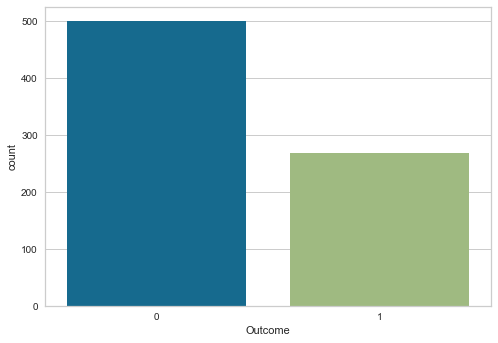

In [118]:
sns.countplot('Outcome',data =df_copy)

In [119]:
result.sort_values(by = ['AUC'],ascending =False)

,Model Name,Precision_no_diabetes,Precision_diabetes,Recall_no_diabetes,Recall_diabetes,AUC,Mean_Test_Score
0,Logistic Regression,0.78,0.75,0.89,0.58,0.85,0.828214
3,Support Vector Classifier,0.75,0.81,0.94,0.46,0.84,0.763792
7,Catboost Classifier,0.80,0.71,0.85,0.63,0.84,0.834404
2,Random Forest Classifier,0.77,0.70,0.86,0.58,0.83,0.835783
4,Naive Bayes Classifier,0.78,0.71,0.86,0.60,0.83,0.818034
9,GBM Classifier,0.80,0.72,0.86,0.63,0.83,0.836623
6,XGBoost Classifier,0.80,0.68,0.81,0.67,0.82,0.797803
8,LightGbm Classifier,0.81,0.66,0.79,0.68,0.80,0.822453
1,Decision Tree Classifier,0.80,0.61,0.75,0.68,0.79,0.795532
5,KNeighbors Classifier,0.74,0.68,0.87,0.49,0.76,0.813132


<h3 style='color:red'>Observations: </h3>

**Model Comparison:**

* From above graph we can see that the dataset is imbalanced.
* In case of such dataset, AUC score is a better measure of determining model's accuracy.
* From the 'result' dataframe, we can conclude that logistic regression is a best model in classification of diabetic and non-diabetic patients with an AUC of 85%.
* With KNN, the model precisely classifies non-diabetic patients but has poor performance in identifying diabetic patients.
* Considering, mean test score and AUC, knn has least AUC(76%) amongst all the model. 
* For the availabe dataset, knn will not be a good algorithm, the reason being, it doesn't make any assumptions for model building.
* Considering Mean Test Score, Gradient boosting machine algorithm has highest score of 83.66%. It also has a good AUC score, Apart form Loistic regression, GBM seems to be a promising algorithm as well
* For Catboost Classifier also, the mean trst score is quite good(83.44%), AUC is 84% and there is acceptable range of precison and recall.

# Data Reporting -

A  dashboard is created in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

**Link for tableau dashboard -**

https://public.tableau.com/app/profile/shamali.sawant/viz/Capstone-Healthcare_16292779630480/Dashboard3?publish=yes

<img src ='Dashboard 3.png'>

# The End..!